# <p style="background-color:yellow; font-family:Berlin Sans FB Demi; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">🌞 **Predicting Solar Energy Production** 
🚀 *Harnessing Machine Learning for Renewable Energy Innovation*

---

![](https://miro.medium.com/v2/resize:fit:1200/1*ckBRFEd9AoLjz6OrSB1bBw.png)

<div style="border-radius:10px; padding: 15px; background-color: red; font-size:115%; text-align:left">

# <p style="background-color:yellow; font-family:Berlin Sans FB Demi; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">**Problem Statement**
The rapid expansion of solar energy as a key renewable resource demands precise forecasting tools to optimize planning, integration, and financial investments. However, predicting annual solar energy production for new installations is challenging due to various factors, including:  

- 🌤️ **Meteorological variations** (e.g., sunlight intensity, cloud cover, and seasonal changes).  
- 🌍 **Geographic diversity** affecting solar irradiance patterns.  
- ⚡ **Technological disparities** across photovoltaic systems.  

To address these challenges, this project aims to develop a **data-driven machine learning model** capable of accurately forecasting annual solar energy production. This solution is designed to support a prominent renewable energy provider in:  

1. **Enhancing project planning** by estimating potential energy output at prospective sites.  
2. **Optimizing grid integration** to balance demand and supply effectively.  
3. **Maximizing return on investment** through precise energy production predictions.  

In [43]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from xgboost import XGBRegressor
import lightgbm as lgb
import catboost as cat
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

#<div style="background-color: #2E2222; padding: 25px; border-radius:50px 50px; width:90%;">
    <p style="background-color:#6b5c5c; font-family:Book Antiqua; color:white; font-size:230%; text-align:center; border-radius:0px 0px;">• |📜 Table of Contents|•</p>

---

### 1️⃣ **🔍 Data Journey**  
   - 🗂️ **Dataset Overview**  
     - 🌐 *General Structure*  
     - 🗝️ **Column Categories**  
       - 🛠️ *Categorical Columns*  
       - 📊 *Numeric Columns*  
       - 📅 *Date Columns*  
     - ✨ *Notable Columns*  
     - 🧹 *Data Quality Insights*  
     - 📈 *Statistical Analysis*

---

### 2️⃣ **🎨 Exploratory Data Analysis (EDA)**  
   - 🧐 *Visualizing and Understanding Patterns*  

---

### 3️⃣ **🛠️ Data Preparation**  
   - 🤖 *Filling Missing Values*  
   - 🛡️ *Outlier Handling*  
   - 🔄 *Transforming Categorical Data to Numerical*

---

### 4️⃣ **💻 Model Development**  
   - 🚀 **XGBoost Regressor**  
   - ⚡ **LightGBM Regressor**  
   - 🐱 **CatBoost Regressor**  
   - 🌳 **Random Forest Regressor**  
   - 🌟 **Gradient Boosting Regressor**

---

### 5️⃣ **📊 Results and Insights**  
   - 📜 *Results for All Models*  
   - 🏆 *Model Comparison*

---

# <p style="background-color:yellow; font-family:; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Load Dataset </p>

In [44]:
# Load the data

solar = pd.read_csv('Solar Energy.csv')

# Display the first few rows of the dataset
solar.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [45]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [46]:
solar.shape

(218115, 17)

In [47]:
solar.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip,218019.0,11751.734473,962.129108,10001.00,11220.00,11717.00,12018.00,14905.0
Estimated PV System Size (kWdc),218115.0,24.507977,291.525394,0.01,5.27,7.13,10.24,43470.0
PV System Size (kWac),218115.0,19.065451,211.419642,0.01,4.50,6.09,8.75,31500.0
Estimated Annual PV Energy Production (kWh),218115.0,28768.278592,342204.175266,14.00,6180.00,8364.00,12017.00,51026825.0
Energy Storage System Size (kWac),4091.0,32.174727,296.161116,0.35,5.00,7.60,10.00,5000.0
Number of Projects,218115.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0


In [48]:
solar.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [49]:
categorical_colunm = solar.select_dtypes(include=['object']).columns
categorical_colunm

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method'],
      dtype='object')

In [50]:
numeric_cols = solar.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Zip', 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
       'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

In [51]:
solar.duplicated().sum()

0

---

# 🌟 **Dataset Overview**

## 📊 General Structure
- **Total Rows:** 218,115  
- **Total Columns:** 17  

---

## 🔑 **Column Categories**

### 1. *Categorical Columns*
   - Examples: `Utility`, `County`, `Division`
   - Highlights:
     - **`Utility`**:  
       - Unique Values: 7  
       - Most Frequent: *PSEGLI*  
     - Other Fields: `Division`, `Substation`

### 2. *Numeric Columns*  
   - Examples:  
     - **`Estimated PV System Size (kWdc)`**  
       - Range: 0.01 to 43,470  
       - Mean: 24.51  
     - **`Energy Storage System Size (kWac)`**  
       - Sparse: Only 4,091 non-null entries out of 218,115  

### 3. *Date Columns*
   - **`Data Through Date`**  
   - **`Interconnection Date`**

---

## 🚀 **Notable Columns**
- **`Estimated PV System Size (kWdc)`** & **`PV System Size (kWac)`**  
  - Core metrics for solar project performance.  
- **`Estimated Annual PV Energy Production (kWh)`**  
  - Represents energy production estimates.  
- **`Energy Storage System Size (kWac)`**  
  - Critical but sparsely populated.

---

## 🛠️ **Data Quality Insights**
- **Missing Values:**  
  - Significant gaps in columns like `Division` & `Substation`.  
- **Mixed Data Types:**  
  - Found in fields such as `Project ID` & `Zip`.  

---

## 📈 **Statistical Analysis**
- **Mean PV System Size (kWac):** `19.07`
- **Standard Deviation:** `211.42`
- **Median Annual Energy Production:** `8,364 kWh`

---

💡 *This dataset offers valuable insights into solar project metrics and energy production, despite some missing and sparse data.* 🌿

---

# **Exploratory Data Analysis (EDA):**


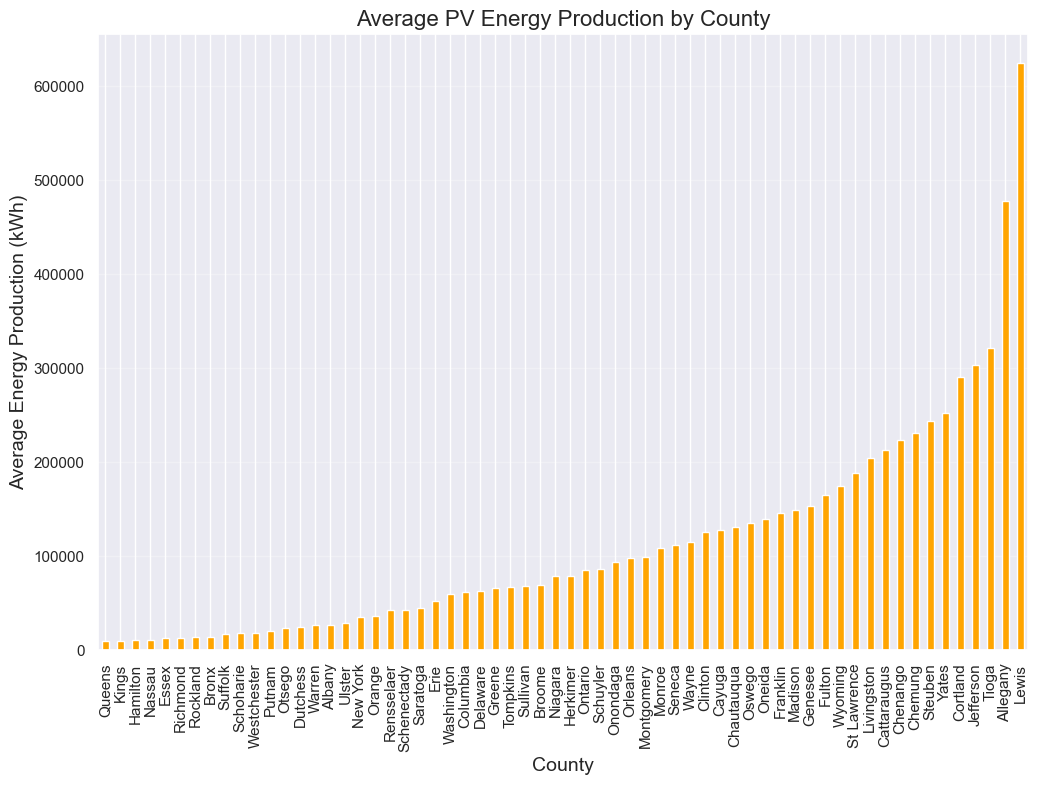

In [52]:
# Average energy production by county
county_avg = solar.groupby('County')['Estimated Annual PV Energy Production (kWh)'].mean().sort_values()

plt.figure(figsize=(12, 8))
county_avg.plot(kind='bar', color='orange')
plt.title('Average PV Energy Production by County', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Average Energy Production (kWh)', fontsize=14)
plt.xticks()
plt.grid(axis='y', alpha=0.3)
plt.show()


# **| Average PV Energy Production by County:-**

This graph provides a **visual representation** of the *average photovoltaic (PV) energy production* across various counties.

## Key Highlights:
- **X-Axis**: Represents the counties.
- **Y-Axis**: Displays the average energy production in **kWh**.

## Observations:
1. Counties are sorted **ascendingly** based on energy production.
2. Initial counties (e.g., *Queens*, *Kings*, *Hamilton*) show **lower production values**.
3. Significant rise in production is observed towards the right, particularly in:
   - **Tioga**
   - **Allegany**
   - **Lewis** (highest production).
4. Bars are displayed in a **bright orange** color for clarity.

This distribution highlights a gradual trend in PV energy production, with a steep increase for the top-producing counties.

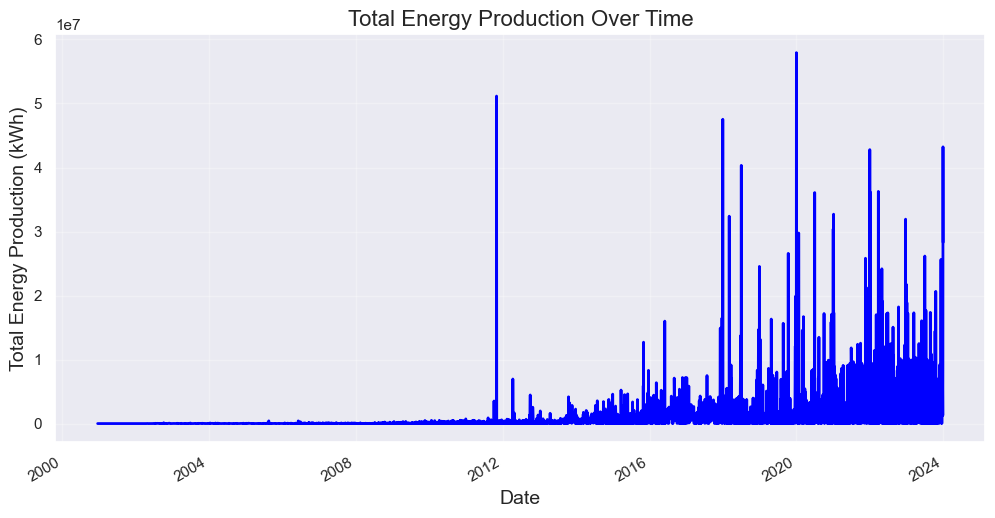

In [53]:
solar['Interconnection Date'] = pd.to_datetime(solar['Interconnection Date'])
production_by_date = solar.groupby('Interconnection Date')['Estimated Annual PV Energy Production (kWh)'].sum()

plt.figure(figsize=(12, 6))
production_by_date.plot(color='blue', linewidth=2)
plt.title('Total Energy Production Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Energy Production (kWh)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


# 📊 **Total Energy Production Over Time**

---

### **🗓 X-Axis: Date**
- Represents the progression of time from **2000 to 2024**.
- Time appears linear and evenly spaced, showing a clear temporal trend.

### **⚡ Y-Axis: Total Energy Production (kWh)**
- Displays total energy output ranging from **0 to ~60 million kWh**.
- Values are labeled using **scientific notation** (e.g., \( 10^7 \)) for clarity.

---

### **🔍 Observations and Insights**

1. **🧪 Early Years (2000–2011):**
   - Energy production remains **minimal** and relatively steady.
   - Almost no significant spikes.

2. **🚀 Sharp Increase (~2011–2012):**
   - A **sudden spike** marks a breakthrough in production.
   - Could signal **technological advancements**, **policy changes**, or new **capacity additions**.

3. **📈 Post-2012: Growth and Volatility**
   - Energy production shows consistent **growth** with periodic **sharp peaks** and **troughs**.
   - Peaks become **larger** and more **frequent** over time.

4. **🌋 Highlight Moment (~2020):**
   - A particularly **massive spike** occurs around 2020, indicating a notable surge in production.

5. **🔵 Visualization Style:**
   - Data is represented as a **continuous blue line**, emphasizing fluctuations.
   - Background is **light blue**, providing a clean and clear presentation.

---

### **💡 Key Takeaways**
- Energy production remained **low** until ~2011.
- Post-2012, the data reflects **exponential growth** with increasing volatility.
- **2020** stands out as a year of exceptional energy production.

🔍 The plot effectively captures the **evolution** of energy production over two decades, highlighting moments of **growth**, **breakthroughs**, and **periodic spikes**.

--- 
**🎨 Creative Representation by Markdown**

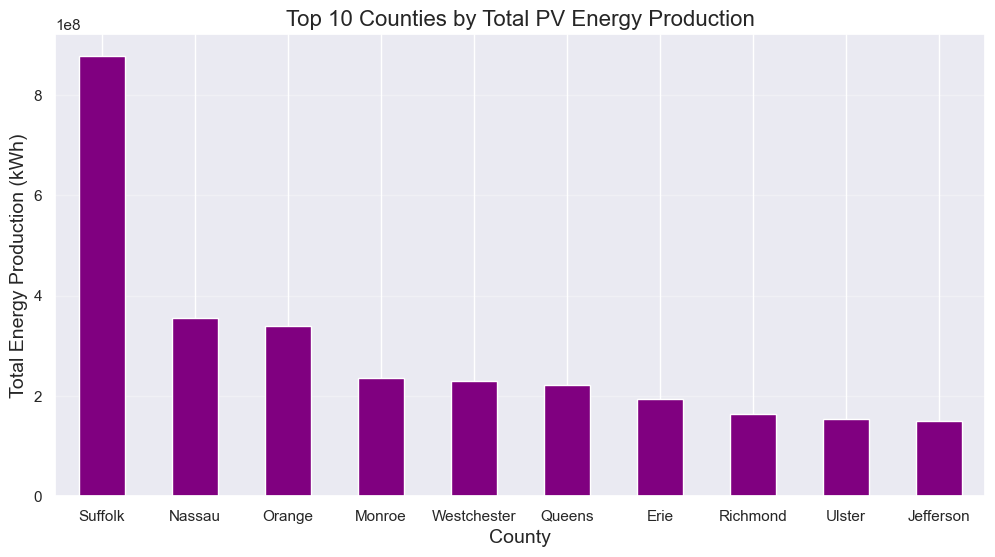

In [54]:
# Total energy production by county
county_total = solar.groupby('County')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
county_total.plot(kind='bar', color='purple')
plt.title('Top 10 Counties by Total PV Energy Production', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Total Energy Production (kWh)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 🏆 **Top 10 Counties by Total PV Energy Production**

---

### **🔎 X-Axis: County**
- Lists the **top 10 counties** contributing the most to **PV (Photovoltaic) Energy Production**.
- Counties include:  
  **Suffolk, Nassau, Orange, Monroe, Westchester, Queens, Erie, Richmond, Ulster, and Jefferson**.

### **⚡ Y-Axis: Total Energy Production (kWh)**
- Displays the **total energy production** in kilowatt-hours (kWh), with a range from **0 to 900 million kWh**.

---

### **📊 Key Observations**

1. **🏅 Suffolk County**:
   - Leads by a **wide margin**, producing over **850 million kWh**.
   - This county's production significantly surpasses all others.

2. **🥈 Nassau and Orange Counties**:
   - Follow as the **second** and **third** highest contributors.
   - Both counties produce approximately **350 million kWh**, with Orange slightly behind Nassau.

3. **📉 Counties 4–10**:
   - **Monroe, Westchester, Queens, Erie, Richmond, Ulster, and Jefferson** show lower but notable production values.
   - These counties contribute between **150 million to ~230 million kWh**.

4. **⚖️ Distribution**:
   - There is a clear **imbalance**, with Suffolk County's production far outpacing all other counties.

---

### **🟣 Visualization Style**
- The bar plot uses a **purple color palette**, enhancing visual contrast.
- The clean design emphasizes each county's contribution without clutter.

---

### **💡 Insights**
- Suffolk County is a **dominant leader** in PV energy production.
- The production drops **significantly** after the top 3 counties, indicating a large disparity in energy contributions.

**🔍 Use Case**: This analysis highlights the counties driving PV energy efforts and areas for potential growth in energy production.

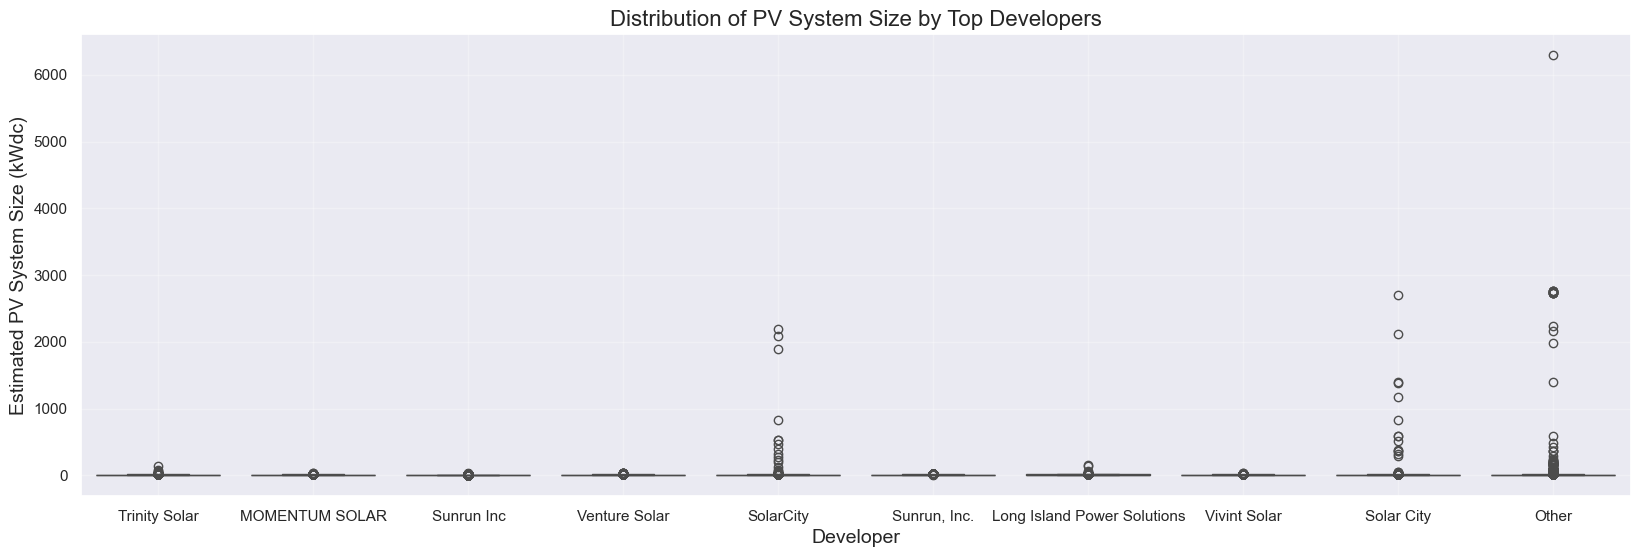

In [55]:
# Select top 10 developers by project count
top_developers = solar['Developer'].value_counts().head(10).index

plt.figure(figsize=(20, 6))
sns.boxplot(x='Developer', y='Estimated PV System Size (kWdc)', data=solar[solar['Developer'].isin(top_developers)])
plt.title('Distribution of PV System Size by Top Developers', fontsize=16)
plt.xlabel('Developer', fontsize=14)
plt.ylabel('Estimated PV System Size (kWdc)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()


# 📊 **Distribution of PV System Size by Top Developers**

---

### **🗂 X-Axis: Developer**
- Represents the **top PV developers** along with an "Other" category.
- Developers include:  
  **Trinity Solar, MOMENTUM SOLAR, Sunrun Inc, Venture Solar, SolarCity, Sunrun, Inc., Long Island Power Solutions, Vivint Solar, Solar City, and Other.**

### **⚡ Y-Axis: Estimated PV System Size (kWdc)**
- Displays the **system size** in kilowatts (kWdc), ranging from **0 to 6,000 kWdc**.

---

### **🔍 Key Observations**

1. **🟢 General Trend**:
   - Most PV system sizes are **small** (clustered near the bottom of the y-axis).
   - The majority of systems fall within the **0 to 500 kWdc** range.

2. **📈 Outliers**:
   - Several developers have notable **outliers**:
     - **SolarCity** and **Solar City** show a significant number of large systems, including systems over **2,000 kWdc**.
     - The **"Other" category** contains the largest PV systems, with values reaching up to **6,000 kWdc**.
   - These outliers suggest **large-scale installations** that skew the distribution.

3. **🏢 Developer Comparison**:
   - **SolarCity/Solar City** and the **Other** category have more variability, showing a broader range of system sizes.
   - Other developers (e.g., **Trinity Solar, MOMENTUM SOLAR**) have smaller, consistent system sizes with fewer outliers.

4. **⚖️ Distribution**:
   - Boxplots indicate **tight clusters** of system sizes for most developers.
   - Variability is most prominent in the **SolarCity** and **Other** categories.

---

### **🎨 Visualization Style**
- **Boxplots** effectively show:
   - The **median** system size.
   - The **range** of typical values.
   - Presence of **outliers** (marked as points above the boxes).
- Background shading enhances readability.

---

### **💡 Key Insights**
- The majority of PV systems are **small-scale**, likely residential or commercial installations.
- Large-scale systems are concentrated in **SolarCity** and the **Other** category.
- Developers with fewer outliers (e.g., **Trinity Solar**) likely focus on smaller, standardized installations.

**🔍 Use Case**: This plot highlights differences in system size distributions among developers, helping identify trends in PV system installations.

In [56]:
# Assuming 'solar' DataFrame already exists and contains the 'Division' column
division_counts = solar['Division'].value_counts().reset_index()
division_counts.columns = ['Division', 'Number of Projects']

# Create a bar plot with Plotly
fig = px.bar(division_counts, 
             x='Division', 
             y='Number of Projects', 
             title='Number of Projects by Division', 
             color='Number of Projects',
             color_continuous_scale='Teal',
             labels={'Division': 'Division', 'Number of Projects': 'Number of Projects'},
             text='Number of Projects')

# Update layout for better aesthetics
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_font_size=16, 
                  xaxis_title_font_size=14, 
                  yaxis_title_font_size=14,
                  xaxis=dict(title='Division'),
                  yaxis=dict(title='Number of Projects'),
                  template='plotly_white')

# Show the figure
fig.show()

# Number of Projects by Division

This bar chart offers an insightful overview of the **project distribution** across various divisions within the organization. Below is a detailed summary of its key features:

## 📊 Key Features

### Scale
- **Y-Axis**: Represents the **number of projects**, ranging from **0 to about 20,000**.

### Distribution
- There is a **clear disparity** in the number of projects among divisions. A select few divisions lead with significantly higher project counts compared to others.

### Top Performers
The following divisions stand out with the **highest project counts** (approximately **10,000-20,000**):
- **GENV-KO**
- **GENV-AK**
- **GENV-AV**
- **NIKU-Auth**

### Mid-Range Divisions
- Several divisions boast a **project count** between **2,000 to 5,000**.

### Long Tail Effect
- Many divisions on the **right side of the chart** show very few projects, creating a **long tail effect** in the distribution.

### Color Coding
- The bars are **color-coded** from **dark blue** to **light blue**, where darker shades indicate **higher project counts**.

### Labeling
- Division names are displayed along the **x-axis**. However, readability may be compromised due to the **high number of divisions** represented.

## 💡 Conclusion
This visualization effectively highlights the stark differences in project distribution across divisions, making it a valuable tool for **resource allocation** and **identifying areas of high activity** within the organization.

In [57]:
import plotly.graph_objects as go

# Convert 'Interconnection Date' to datetime
solar['Interconnection Date'] = pd.to_datetime(solar['Interconnection Date'], errors='coerce')

# Group and calculate cumulative sum of energy production
cumulative_production = (
    solar.groupby('Interconnection Date')['Estimated Annual PV Energy Production (kWh)']
    .sum()
    .cumsum()
)

# Create a Plotly figure
fig = go.Figure()

# Add the cumulative production trace
fig.add_trace(
    go.Scatter(
        x=cumulative_production.index,
        y=cumulative_production.values,
        mode='lines',
        line=dict(color='darkblue', width=2),
        name='Cumulative Production'
    )
)

# Update layout for better visualization
fig.update_layout(
    title='Cumulative Energy Production Over Time',
    xaxis_title='Date',
    yaxis_title='Cumulative Energy Production (kWh)',
    template='plotly_white',
    font=dict(size=14),
    title_font=dict(size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
)

# Show the Plotly plot
fig.show()

# |**Cumulative Energy Production Over Time (2005 - 2022):-**

This graph illustrates the **Cumulative Energy Production** measured in kilowatt-hours (kWh) from approximately **2005 to 2022**. Below are the key features that highlight the trends and insights from this data:

## Key Features

- **Measure**:
  - The **Y-Axis** represents **cumulative energy production** in **kWh**, ranging from **0 to 6 billion kWh**.

- **Time Span**:
  - The **X-Axis** spans the years from **2005 to 2022**.

## Growth Pattern
- The curve exhibits a **clear exponential growth trend** in cumulative energy production.

### Initial Phase (2005 - 2010)
- The early years show **minimal growth**, with the line hovering **close to zero**.

### Acceleration Phase (2010 - 2015)
- From around **2010**, the curve begins to **rise noticeably**, marking the **start of significant energy production**.

### Rapid Growth (2015 - 2022)
- Post-2015, the rate of cumulative energy production **dramatically increases**:
  - The curve becomes **steeper each year**, indicating accelerated production rates.

### Recent Years (2020 - 2022)
- The steepest section of the curve occurs in the most **recent years (2020-2022)**:
  - This suggests the **highest rate of energy production growth** in this period.

## Final Value
- By the end of the graph in **2022**, cumulative energy production reaches **just over 6 billion kWh**.

---

This visualization effectively highlights the **exponential growth** in energy production over the past two decades, particularly emphasizing the **rapid acceleration** in recent years. It serves as a compelling representation of the **adoption and scaling of renewable energy technologies** or the **expansion of energy production capacity** in a specific region or sector.

In [58]:
import pandas as pd
import plotly.express as px

# Convert 'Interconnection Date' to datetime
solar['Interconnection Date'] = pd.to_datetime(solar['Interconnection Date'], errors='coerce')

# Group projects by interconnection date
projects_over_time = solar.groupby('Interconnection Date').size().reset_index(name='Number of Projects')

# Create a Plotly line plot
fig = px.line(projects_over_time, 
              x='Interconnection Date', 
              y='Number of Projects', 
              title='Number of Projects Over Time',
              labels={'Interconnection Date': 'Interconnection Date', 'Number of Projects': 'Number of Projects'},
              line_shape='linear')

# Update layout for better appearance
fig.update_traces(line=dict(color='darkred', width=2))
fig.update_layout(title_font=dict(size=16), xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))
fig.update_layout(xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'))

# Show the plot
fig.show()

# **|Number of Projects Over Time (2000-2023):-**

This graph presents a compelling visualization of the **number of projects** from approximately **2000 to 2023**. Below is a summary of its key features:

## Key Features:

### 📈 Measure:
- **Y-Axis**: Represents the **number of projects**, ranging from **0 to about 300**.

### ⏳ Time Span:
- **X-Axis**: Displays the **interconnection date**, spanning from **2000 to 2023**.

### 📊 Overall Trend:
- A **clear increase** in the number of projects over time, with significant growth starting around **2012-2013**.

### 🕰️ Early Years (2000-2010):
- Relatively **few projects** during this period, with occasional **small spikes**.

### 🚀 Growth Phase (2010 Onward):
- A noticeable **increase** in project numbers and frequency begins around **2010**.

### 🌟 Peak Activity (2015-2020):
- The **highest concentration** of projects occurs between **2015 and 2020**, with several spikes reaching close to or above **250 projects**.

### 📅 Recent Years (2020-2023):
- Continued **significant activity**, but with **slightly lower peaks** compared to the earlier period of 2015-2020.

### 📈 Variability:
- Considerable **variation** in project numbers day to day, creating a **dense, spiky appearance**.

### 🎨 Color:
- The graph features **dark red data points**, standing out against a **light blue background**.

## Conclusion:
This visualization effectively captures the **evolution of project activity** over more than two decades, highlighting periods of **rapid growth** and **high activity**. It serves as a valuable tool for analyzing trends in project initiation or completion rates within an organization or industry.

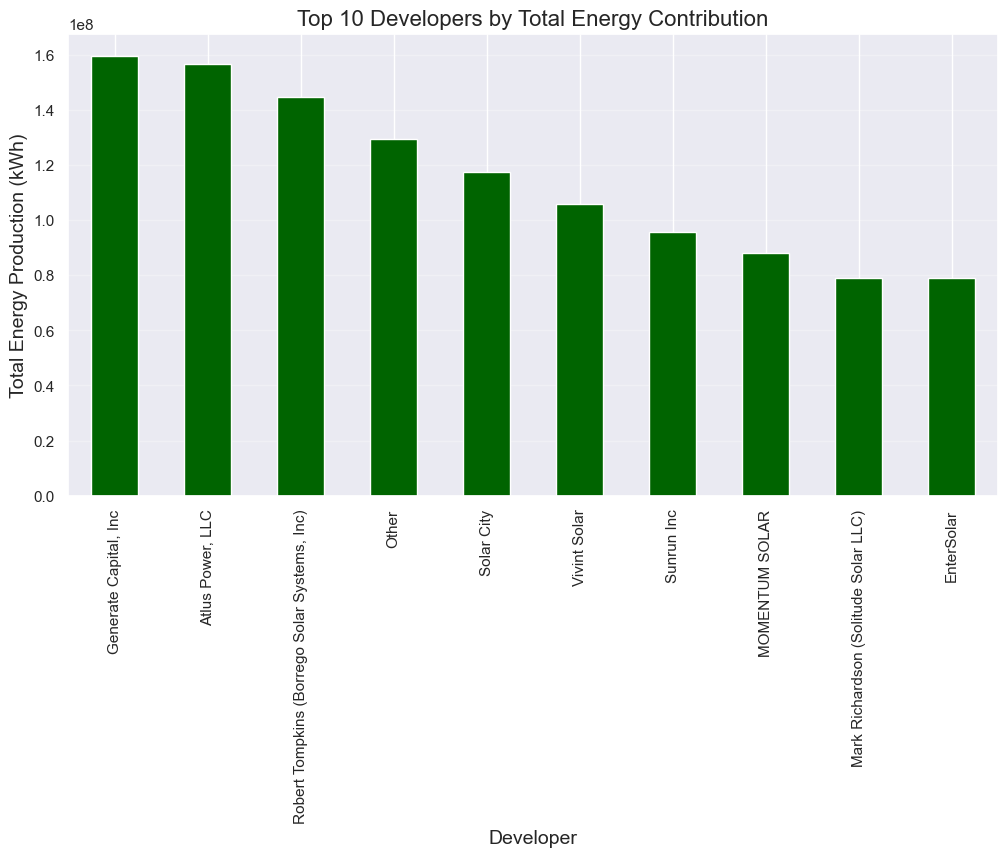

In [59]:
# Total energy production by developer
developer_production = solar.groupby('Developer')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
developer_production.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Developers by Total Energy Contribution', fontsize=16)
plt.xlabel('Developer', fontsize=14)
plt.ylabel('Total Energy Production (kWh)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()


# **|Top 10 Developers by Total Energy Contribution in Renewable Energy:-**

This bar chart highlights the leading contributors in the **renewable energy sector**, specifically showcasing their total energy production in **kilowatt-hours (kWh)**.

## Key Features:

- **Measure**: 
  - The **y-axis** illustrates total energy production, scaled to **10^8 kWh** (equivalent to 100 million kWh).

- **Ranking**: 
  - Developers are ranked based on their total energy contributions, providing a clear comparison of industry leaders.

## Top Performers:

1. **Generate Capital, Inc.**
2. **Altus Power, LLC**
3. **Robert Tompkins (Borrego Solar Systems, Inc.)**

## Energy Contribution Range:

- The chart showcases energy contributions ranging from approximately:
  - **0.8 x 10^8 kWh** (80 million kWh) 
  - to **1.6 x 10^8 kWh** (160 million kWh).

## Distribution Insights:

- A gradual decrease in energy contributions is observed from the top to the bottom of the list.
- The top performers demonstrate significantly higher contributions compared to others.

## Visual Design:

- All bars are presented in **dark green**, symbolizing sustainability and aligning with the renewable energy theme.

## Developer Diversity:

- The list includes a mix of:
  - Established companies (e.g., *Generate Capital, Inc.*, *Altus Power, LLC*)
  - Individual developers or smaller firms (e.g., *Robert Tompkins*, *Mark Richardson*).

## Industry Focus:

- Many names on the list indicate a strong emphasis on **solar energy**, including:
  - *Borrego Solar Systems*, *Vivint Solar*, *Sunrun Inc.*, *MOMENTUM SOLAR*, and *SolarCity*.

## Conclusion:

This visualization serves as an effective comparison of the energy contributions made by the top developers in the **renewable energy sector**, particularly in solar power. It offers a clear insight into which entities are leading in energy production or installation capacity, highlighting the ongoing transition towards sustainable energy solutions.

In [60]:
# Extract year from 'Interconnection Date'
solar['Year'] = pd.to_datetime(solar['Interconnection Date'], errors='coerce').dt.year

# Group by year and division
energy_by_year_division = solar.groupby(['Year', 'Division'])['Estimated Annual PV Energy Production (kWh)'].sum().reset_index()

# Create a stacked bar chart with Plotly
fig = px.bar(energy_by_year_division, 
             x='Year', 
             y='Estimated Annual PV Energy Production (kWh)', 
             color='Division', 
             title='Total Energy Production by Division and Year',
             labels={'Estimated Annual PV Energy Production (kWh)': 'Total Energy Production (kWh)', 'Year': 'Year'},
             text='Estimated Annual PV Energy Production (kWh)',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Update layout for better appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(barmode='stack', 
                  title_font=dict(size=16), 
                  xaxis_title_font=dict(size=14), 
                  yaxis_title_font=dict(size=14), 
                  legend_title_text='Division',
                  xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'),
                  yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'))

# Show the plot
fig.show()

# **| Total Energy Production by Division and Year (2005 - 2020):-**

This stacked bar chart presents a compelling overview of **total energy production** across various divisions from approximately **2005 to 2020**.

## Key Features:

### 1. Measurement
- **Y-Axis**: Represents total energy production in **kilowatt-hours (kWh)**, with a range from **0 to 800 million kWh**.

### 2. Time Span
- **X-Axis**: Displays the years, with data points prominently visible from **2010 to 2020**.

### 3. Divisions
- The chart features multiple divisions, each illustrated with a **distinct color** in the stacked bars. Notable divisions include:
  - **Binghamton**
  - **CENY-W**
  - **East**
  - **Elmira**
  - **Ithaca**
  - **Mechanicville**
  - *(and others)*

### 4. Growth Trend
- A **clear upward trend** in total energy production is evident across all divisions from **2010 to 2020**.

### 5. Exponential Growth
- The increase in energy production resembles an **exponential curve**, particularly noticeable from **2015 onward**.

### 6. Division Contributions
- While all divisions display growth, some divisions contribute more significantly. The segments represented by **blue, red, and green** (likely **Binghamton**, **CENY-W**, and **East**) dominate the bars in the later years.

### 7. Early Years
- Minimal energy production is evident before **2010**, indicating the initiation of substantial **renewable energy initiatives** around that period.

### 8. Recent Years
- By **2020**, total energy production across all divisions approaches nearly **800 million kWh**.

### 9. Legend
- A **color-coded legend** on the right side of the chart provides clarity on the divisions included in the data.

---

This visualization vividly illustrates the **rapid growth** in energy production across multiple divisions over a decade, highlighting both the **overall increase** and the **relative contributions** of different divisions to this growth.

# **Filling Missing Value**

In [62]:
# Step 1: Create a copy of the original DataFrame for comparison
solar_original = solar.copy()

In [63]:
for column in solar.columns:
    if solar[column].dtype == 'object':
        # Fill categorical columns with the mode
        solar[column].fillna(solar[column].mode()[0], inplace=True)
    else:
        # Fill numerical columns with the median
        solar[column].fillna(solar[column].median(), inplace=True)

---
## <h3 align="center"><font color=white>: Outliers Handling :</font></h10>
---


- # Check for outliers in numerical columns

In [64]:
# List to store columns with outliers
columns_with_outliers = []

# Check for outliers in numerical columns
for column in solar.select_dtypes(include='number').columns:
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['Zip', 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)', 'Energy Storage System Size (kWac)', 'Number of Projects', 'Year']


In [65]:
# Step 2: Handle Outliers

for column in numeric_cols:
    # Calculate outliers based on IQR
    Q1 = solar[column].quantile(0.25)
    Q3 = solar[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and replace outliers
    solar[column] = np.where(
        (solar[column] < lower_bound) | (solar[column] > upper_bound),
        np.nan,  # Replace outliers with NaN
        solar[column]
    )
    # Step 3: Refill Missing Values After Outlier Handling
for column in numeric_cols:
    solar[column].fillna(solar[column].median(), inplace=True)  # Refill outliers that are now NaN

In [66]:
solar_original.shape

(218115, 18)

In [67]:
solar_original.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
Year                                                0
dtype: int64

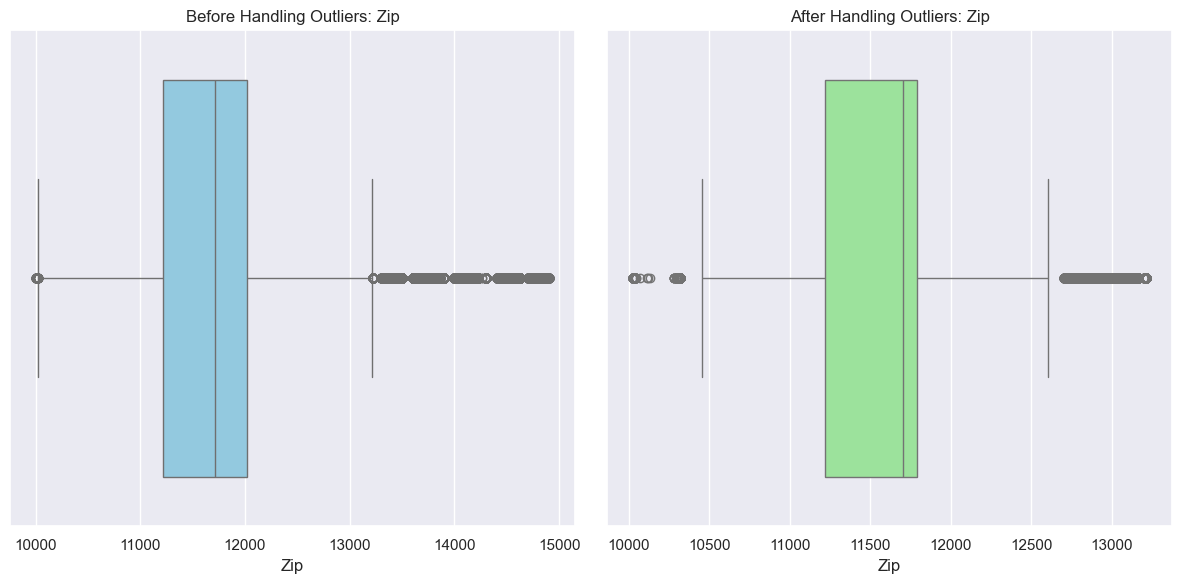

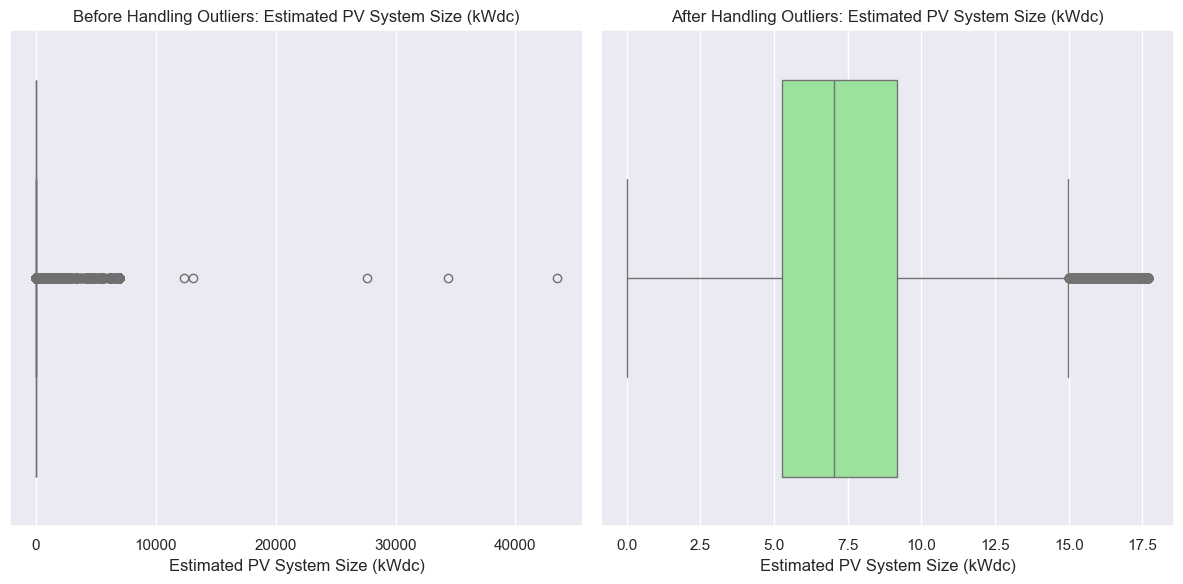

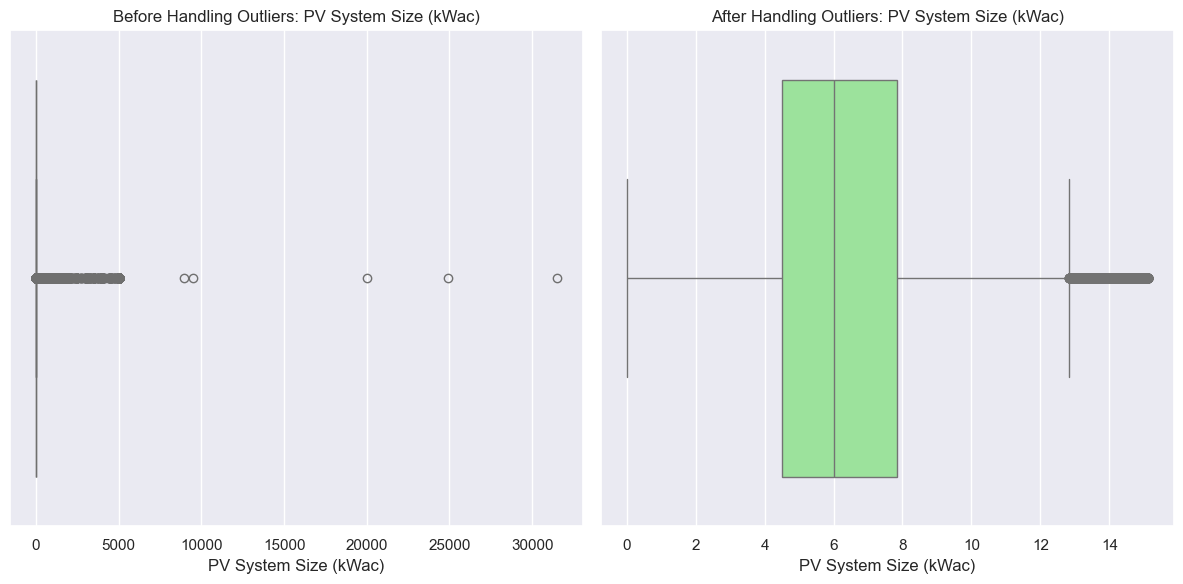

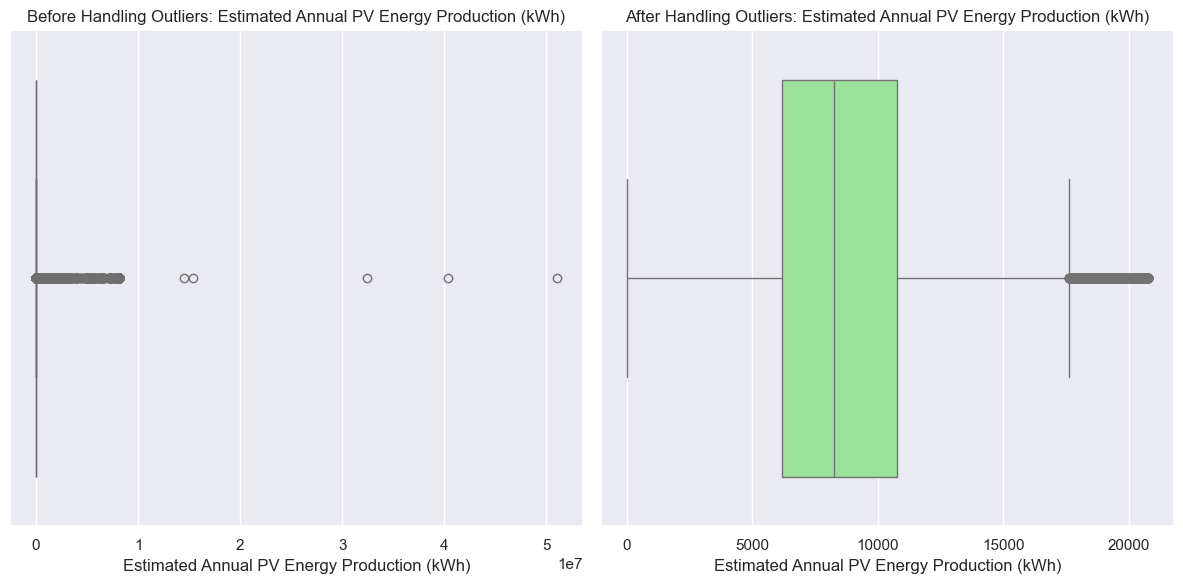

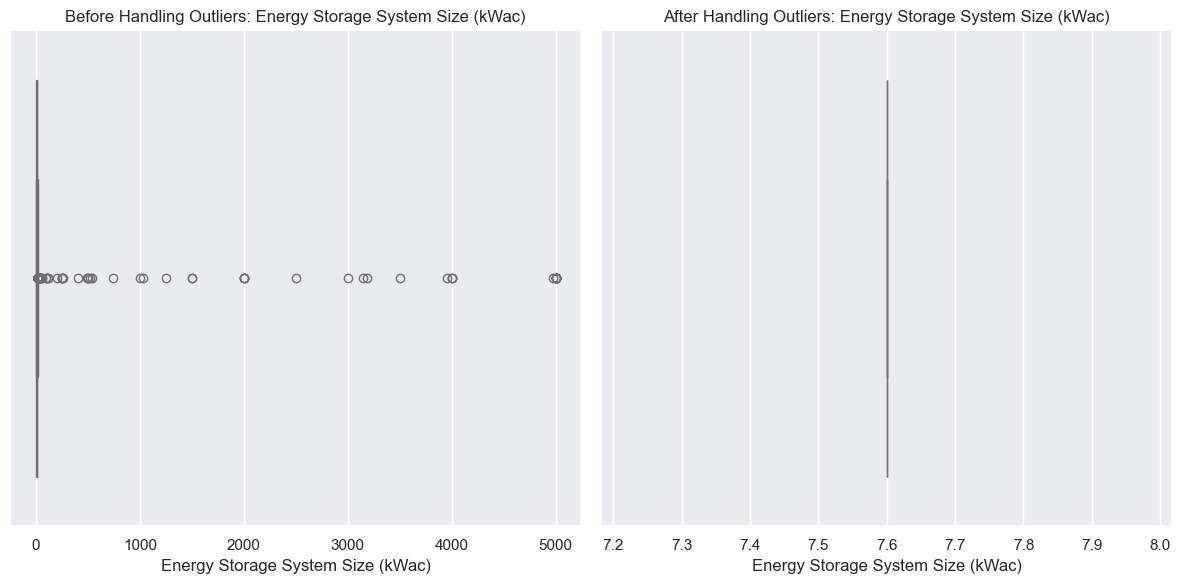

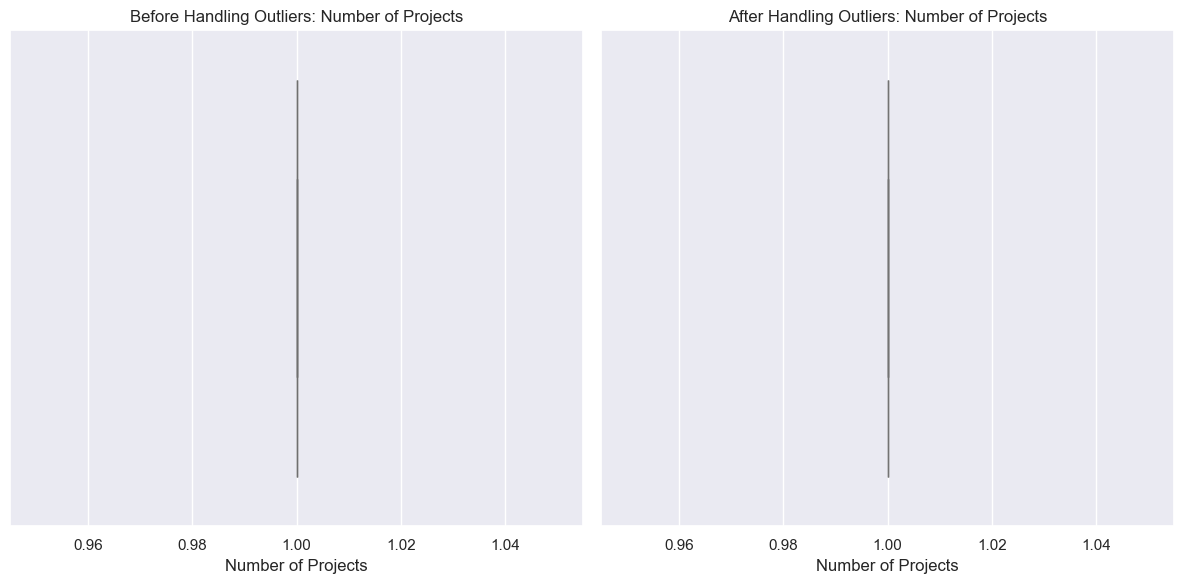

In [68]:
# Step 4: Visualization
# Create boxplots for outliers before and after handling
for column in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Boxplot before handling outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=solar_original[column], color='skyblue')
    plt.title(f'Before Handling Outliers: {column}')
    
    # Boxplot after handling outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=solar[column], color='lightgreen')
    plt.title(f'After Handling Outliers: {column}')

    plt.tight_layout()
    plt.show()


In [69]:
# Optionally, check the shape of the data before and after removing outliers
print(f'Original shape: {solar.shape}')

Original shape: (218115, 18)


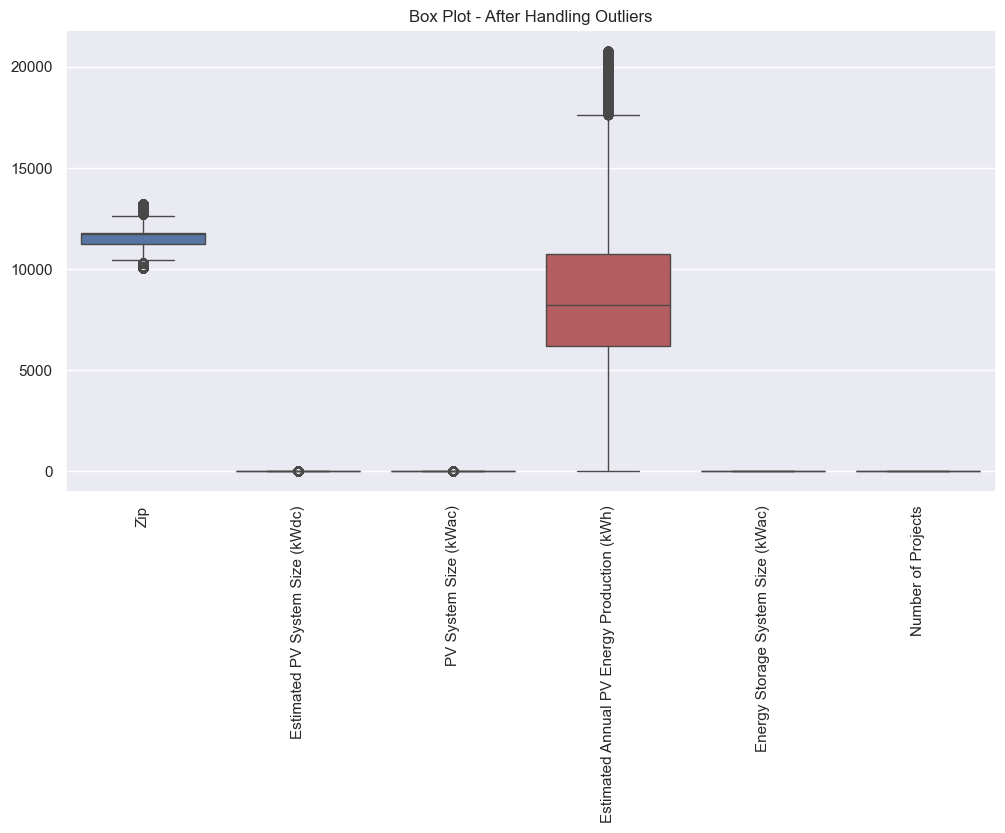

In [70]:
# Step 4: Visualize after outlier removal (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=solar[numeric_cols])
plt.title('Box Plot - After Handling Outliers')
plt.xticks(rotation=90)
plt.show()

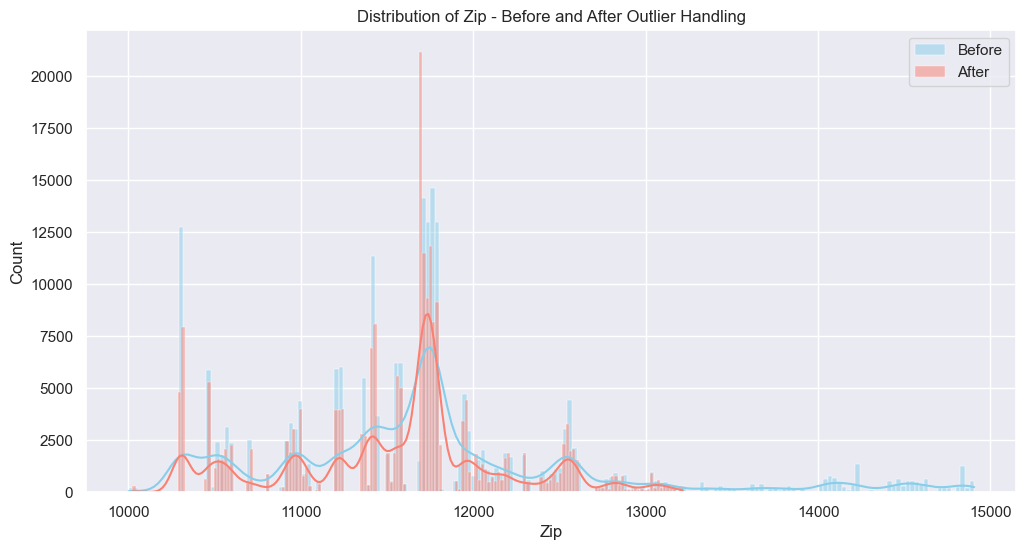

In [71]:
# Histogram to show distribution before and after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(solar_original[numeric_cols[0]], kde=True, color='skyblue', label='Before')
sns.histplot(solar[numeric_cols[0]], kde=True, color='salmon', label='After')
plt.legend()
plt.title(f'Distribution of {numeric_cols[0]} - Before and After Outlier Handling')
plt.show()

# 📉 **Summary of Handling Outliers**

Outliers are data points that deviate significantly from the rest of the dataset. They can arise due to variability in the data or may indicate errors. Proper handling of outliers is crucial as they can skew results and impact the performance of machine learning models.

## **Identifying Outliers**

1. **Statistical Methods**:  
   - **Z-Score**: A common method that identifies outliers based on standard deviations from the mean. A Z-score greater than 3 or less than -3 is often considered an outlier.
   - **Interquartile Range (IQR)**: Outliers can be detected by calculating the IQR (Q3 - Q1) and defining thresholds. Data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are classified as outliers.

2. **Visualization Techniques**:  
   - **Box Plots**: Visualize the distribution of data and highlight potential outliers.
   - **Scatter Plots**: Display relationships between variables, making it easier to spot anomalies.

## **Handling Outliers**

1. **Removal**: Exclude outliers from the dataset when they result from data entry errors or are not representative of the population.

2. **Transformation**: Apply transformations (e.g., logarithmic) to reduce the impact of outliers on the analysis.

3. **Imputation**: Replace outlier values with statistical measures (e.g., mean or median) to minimize their influence.

4. **Model Robustness**: Utilize robust models (e.g., Random Forest, Gradient Boosting) that are less sensitive to outliers.

## **Conclusion**

Handling outliers effectively is essential for enhancing the quality of data analysis and the performance of predictive models. Careful identification and appropriate treatment can lead to more accurate insights and improved decision-making.

In [72]:
# Fill missing values for numerical columns with median (optional: you can choose mean instead)
for column in solar_original.select_dtypes(include=['float64', 'int64']).columns:
    solar_original[column].fillna(solar_original[column].median(), inplace=True)

# Fill missing values for categorical columns with mode
for column in solar_original.select_dtypes(include=['object']).columns:
    solar_original[column].fillna(solar_original[column].mode()[0], inplace=True)

# Check if missing values are filled
print("\nMissing values after imputation:")
print(solar_original.isnull().sum())



Missing values after imputation:
Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Division                                       0
Substation                                     0
Circuit ID                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Energy Storage System Size (kWac)              0
Number of Projects                             0
Year                                           0
dtype: int64


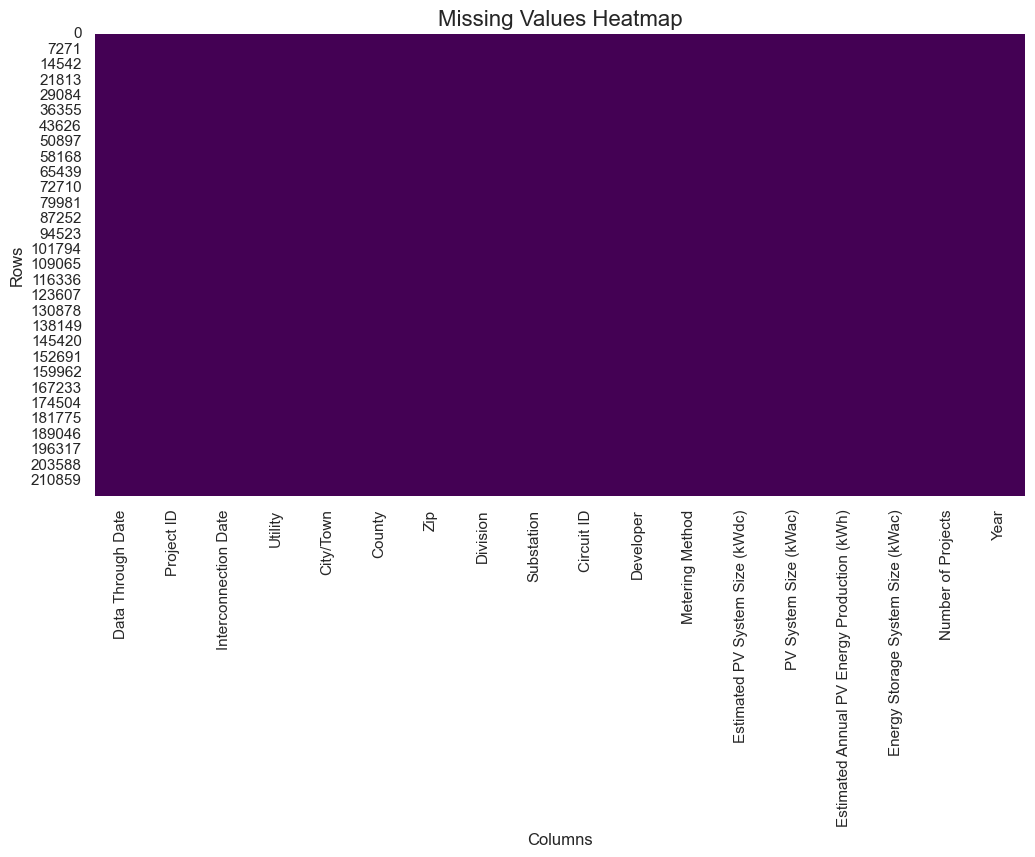

In [73]:
# Visualizing missing value patterns
plt.figure(figsize=(12, 6))
sns.heatmap(solar_original.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()

# Convert Categorical Columns into Numerical Columns

In [74]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in the dataseta
categorical_columns = solar_original.select_dtypes(include=['object']).columns

# Initialize label encoder
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to each categorical column
for col in categorical_columns:
    solar_original[col] = label_encoders[col].fit_transform(solar_original[col].astype(str))

# Display the first few rows to show the result of encoding
solar_original

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects,Year
0,0,218076,2023-12-29,1,2214,40,11418.0,80,725,5873,1160,2,6.05,5.17,7100,7.6,1,2023
1,0,218075,2023-12-29,1,315,2,10473.0,81,2025,4590,1160,2,6.74,5.76,7911,7.6,1,2023
2,0,218074,2023-12-29,1,318,23,11225.0,80,718,3984,1827,2,3.05,2.61,3585,7.6,1,2023
3,0,218073,2023-12-29,1,318,23,11236.0,80,718,1568,1160,2,5.62,4.80,6592,7.6,1,2023
4,0,218072,2023-12-28,1,2538,40,11413.0,83,948,5783,1160,2,6.05,5.17,7100,7.6,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218110,0,21971,2002-12-19,6,1929,58,14519.0,107,345,348,2351,2,2.81,2.40,3296,7.6,1,2002
218111,0,21696,2002-09-24,6,953,1,14739.0,92,532,5498,2351,2,2.93,2.50,3433,7.6,1,2002
218112,0,68230,2018-07-01,5,2392,51,11786.0,83,948,6124,2351,1,34362.00,24900.00,40335490,7.6,1,2018
218113,0,68230,2018-03-03,5,2392,51,11933.0,83,948,6124,2351,1,27600.00,20000.00,32397984,7.6,1,2018


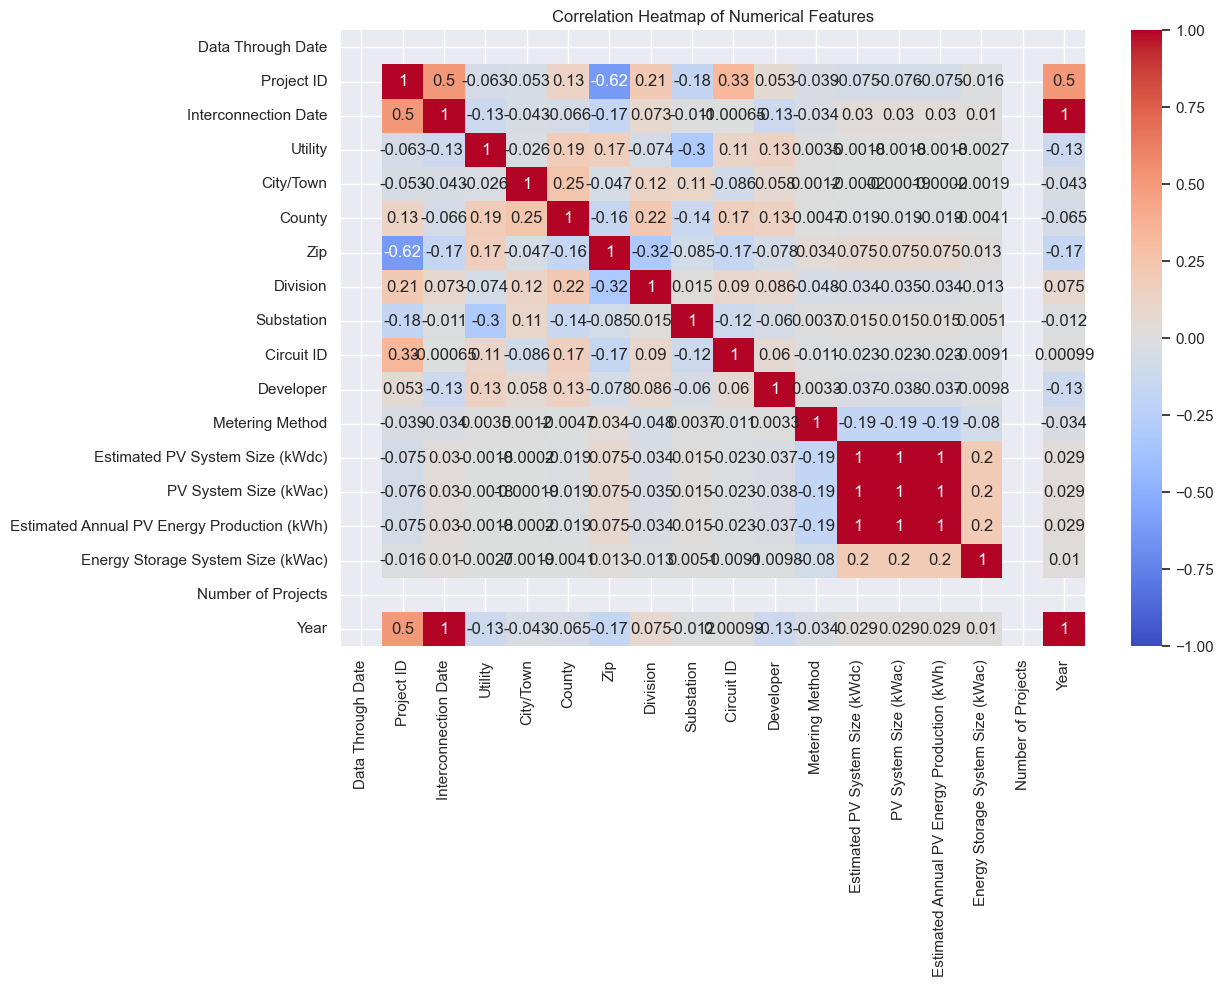

In [75]:

# Plot the correlation heatmap only for numeric columns
plt.figure(figsize=(12, 8))
corr_matrix = solar_original.corr()  # Compute the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [76]:
# Redefine features and target
features = [
    'Utility', 'City/Town', 'County', 'Zip', 'Division', 'Substation',
    'Circuit ID', 'Developer', 'Metering Method',
    'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
    'Energy Storage System Size (kWac)', 'Number of Projects','Year'
]
target = 'Estimated Annual PV Energy Production (kWh)'

In [77]:
X = solar_original[features]
y = solar_original[target]
X

,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Energy Storage System Size (kWac),Number of Projects,Year
0,1,2214,40,11418.0,80,725,5873,1160,2,6.05,5.17,7.6,1,2023
1,1,315,2,10473.0,81,2025,4590,1160,2,6.74,5.76,7.6,1,2023
2,1,318,23,11225.0,80,718,3984,1827,2,3.05,2.61,7.6,1,2023
3,1,318,23,11236.0,80,718,1568,1160,2,5.62,4.80,7.6,1,2023
4,1,2538,40,11413.0,83,948,5783,1160,2,6.05,5.17,7.6,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218110,6,1929,58,14519.0,107,345,348,2351,2,2.81,2.40,7.6,1,2002
218111,6,953,1,14739.0,92,532,5498,2351,2,2.93,2.50,7.6,1,2002
218112,5,2392,51,11786.0,83,948,6124,2351,1,34362.00,24900.00,7.6,1,2018
218113,5,2392,51,11933.0,83,948,6124,2351,1,27600.00,20000.00,7.6,1,2018


In [78]:
y

0             7100
1             7911
2             3585
3             6592
4             7100
            ...   
218110        3296
218111        3433
218112    40335490
218113    32397984
218114    51026825
Name: Estimated Annual PV Energy Production (kWh), Length: 218115, dtype: int64

In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
X_train

,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Energy Storage System Size (kWac),Number of Projects,Year
15808,1,2552,42,10302.0,84,868,3475,2338,2,6.11,5.22,7.6,1,2022
88911,5,1082,51,11946.0,83,948,5932,1558,2,8.14,6.96,7.6,1,2018
4396,1,315,2,10461.0,81,2025,4587,2338,2,5.43,4.64,7.6,1,2023
45681,1,318,23,11236.0,80,718,1553,5,2,2.81,2.40,7.6,1,2018
110622,5,2093,51,11776.0,83,948,5671,543,2,9.02,7.71,7.6,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,5,1240,51,11746.0,83,483,4852,1923,2,3.78,3.23,7.6,1,2015
103694,5,1842,51,11703.0,83,948,5115,1923,2,14.04,12.00,7.6,1,2016
131932,5,1167,51,11946.0,83,948,5934,2351,2,1.61,1.38,7.6,1,2007
146867,1,2392,42,10312.0,84,2197,3603,1807,2,20.59,17.60,7.6,1,2015


In [81]:
y_train

15808      7169
88911      9559
4396       6373
45681      3296
110622    10589
          ...  
119879     4436
103694    16481
131932     1895
146867    24172
121958     8639
Name: Estimated Annual PV Energy Production (kWh), Length: 152680, dtype: int64

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((152680, 14), (65435, 14), (152680,), (65435,))

# **<p style="background-color:red; font-family:Book Antiqua; color:white; font-size:120%; text-align:center; border-radius:1000px 1000px;"> | Machine Learning Models |</p>**

# **|XG Boost Regressor:-**

In [83]:
# Define the model
xgbmodel = XGBRegressor(objective='reg:squarederror', random_state=42)
xgbmodel

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [84]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 0.1, 0.01, 0.001]
}

# RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgbmodel,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [1, 0.1, 0.01, 0.001],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
# Best parameters and model performance
print("Best Parameters:", xgb_random_search.best_params_)

Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.9}


In [131]:
xgb_best_model = xgb_random_search.best_estimator_

# Evaluate the model
xgb_pred = xgb_best_model.predict(X_test)

In [132]:
# Make predictions and evaluate the model

mse = mean_squared_error(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f"RMSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

RMSE: 14755372953.450611
MAE: 7097.747579672263
R2 Score: 0.8601346015930176


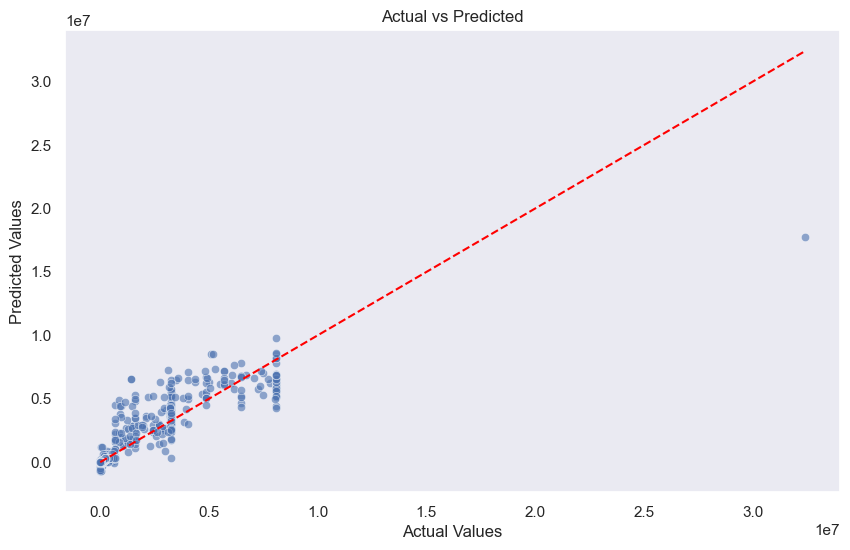

In [133]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=xgb_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

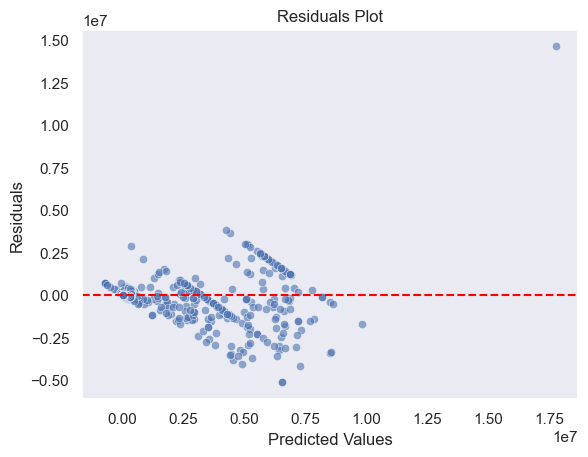

In [134]:
# Residuals plot
residuals = y_test - xgb_pred
sns.scatterplot(x=xgb_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()

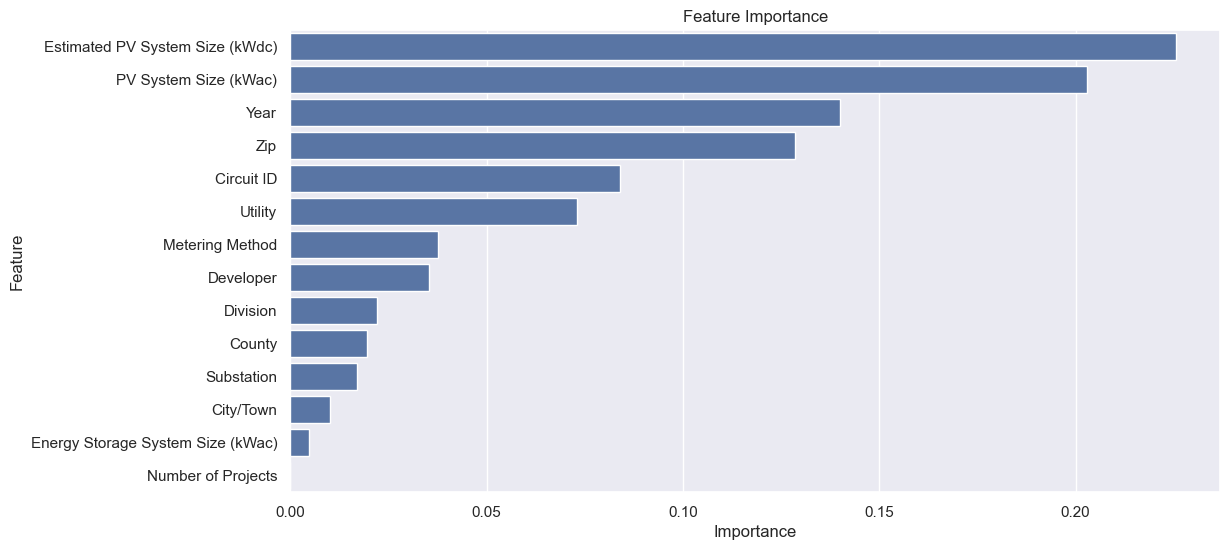

In [135]:
# Feature Importance plot
if hasattr(xgb_best_model, 'feature_importances_'):
    importance = xgb_best_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# **|Light GBM Regressor:-**

In [91]:
# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42,force_row_wise=True)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 152680, number of used features: 13
[LightGBM] [Info] Start training from score 28736.871044


LGBMRegressor(force_row_wise=True, max_depth=10, random_state=42)

In [92]:
# Make predictions and evaluate the model
lgb_pred = lgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
mae = mean_absolute_error(y_test, lgb_pred)
r2 = r2_score(y_test, lgb_pred)

In [93]:
# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Root Mean Squared Error (RMSE): 74710.47105802583
Mean Absolute Error (MAE): 2844.0148577056448
R2 Score: 0.9470917968717653


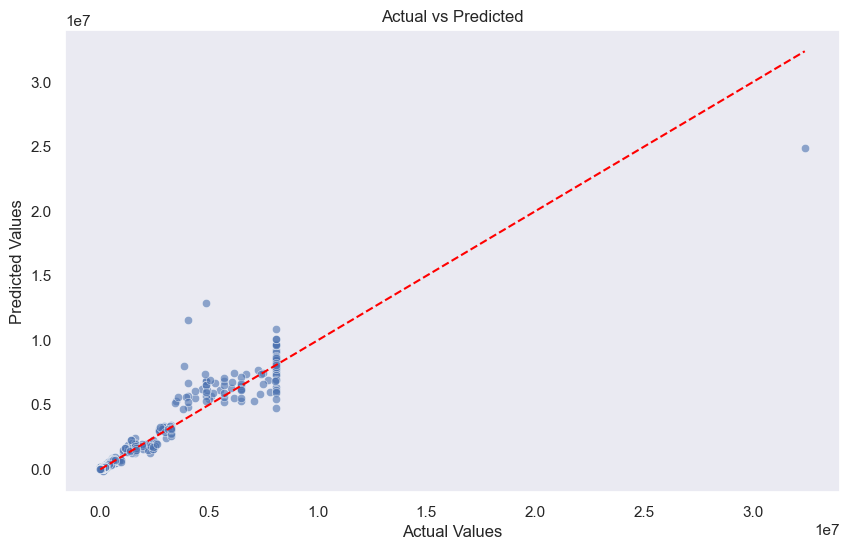

In [95]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lgb_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

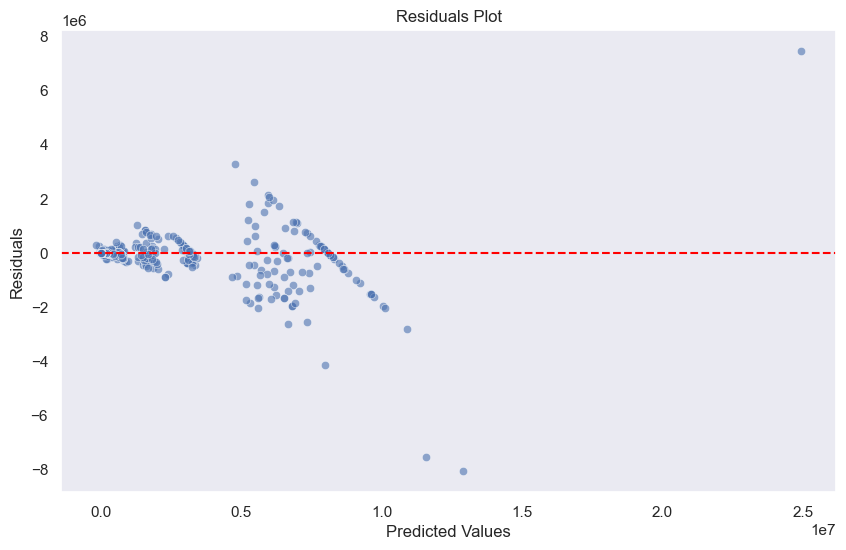

In [96]:
# Residuals plot
residuals = y_test - lgb_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lgb_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()

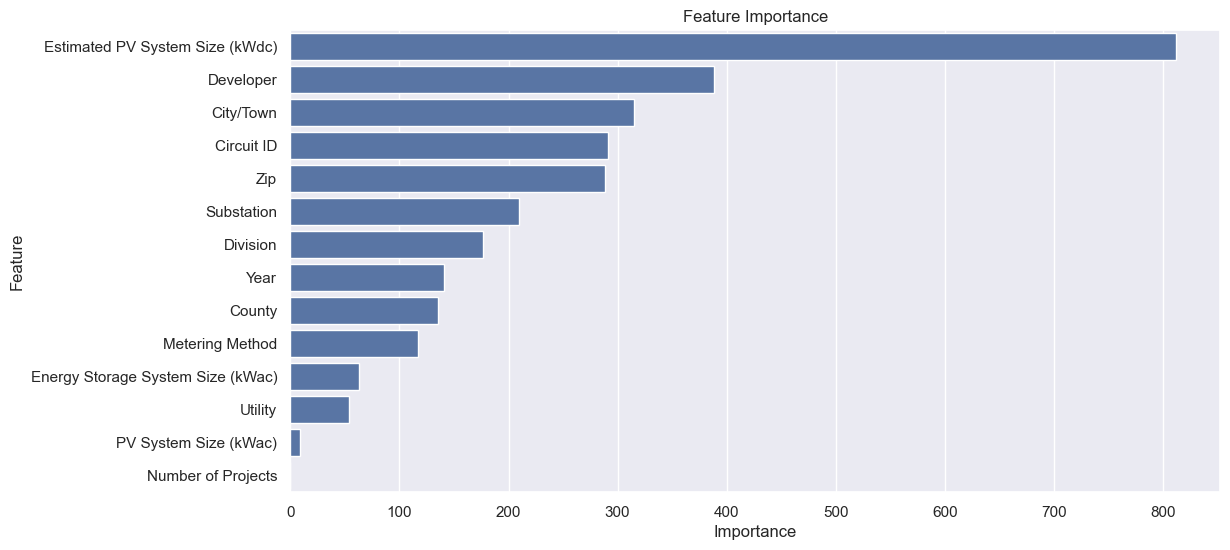

In [97]:
# Feature Importance plot (if applicable to the model)
if hasattr(lgb_model, 'feature_importances_'):
    importance = lgb_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# **|Cat Boost Regressor:-**

In [98]:
# Define the CatBoost regressor
catboost_model = CatBoostRegressor(silent=True)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10],
    'bagging_temperature': [0, 1, 2, 3]
}

# Create the RandomizedSearchCV object
cat_random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='neg_mean_squared_error',  # Define your scoring method
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=1  # Use all available cores
)

# Fit the model
cat_random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters found: ", cat_random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 8, 'bagging_temperature': 0}


In [99]:
# Make predictions and evaluate the model
cat_model = cat_random_search.best_estimator_

cat_pred = cat_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, cat_pred))
mae = mean_absolute_error(y_test, cat_pred)
r2 = r2_score(y_test, cat_pred)

In [100]:
# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Root Mean Squared Error (RMSE): 94486.65325368791
Mean Absolute Error (MAE): 7985.0280085888435
R2 Score: 0.9153745491013655


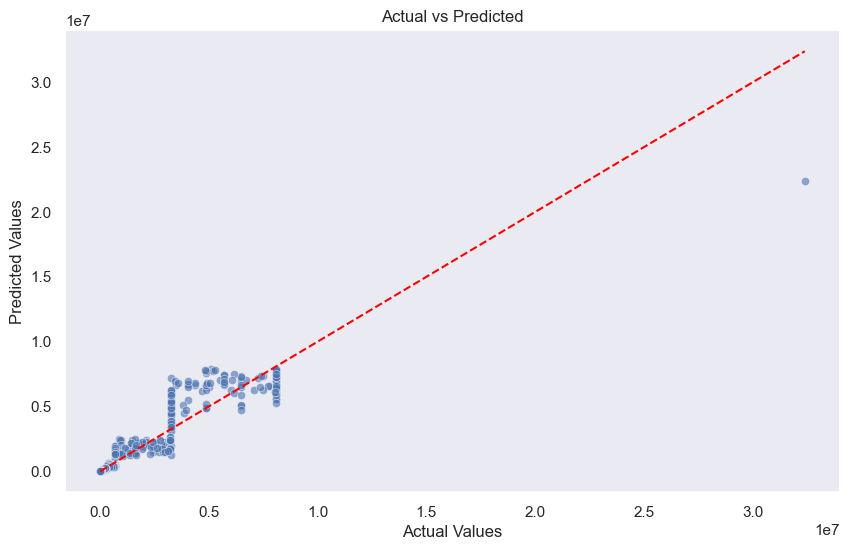

In [101]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=cat_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

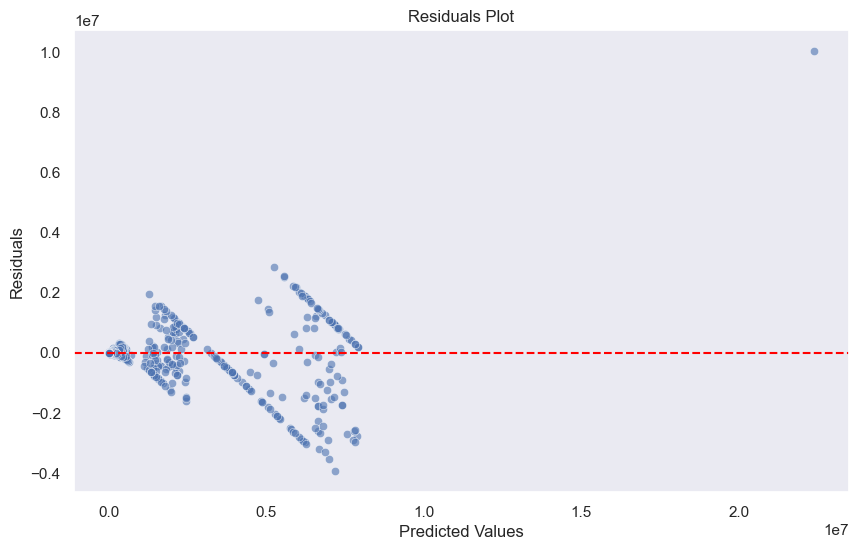

In [102]:
# Residuals plot
residuals = y_test - cat_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cat_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()

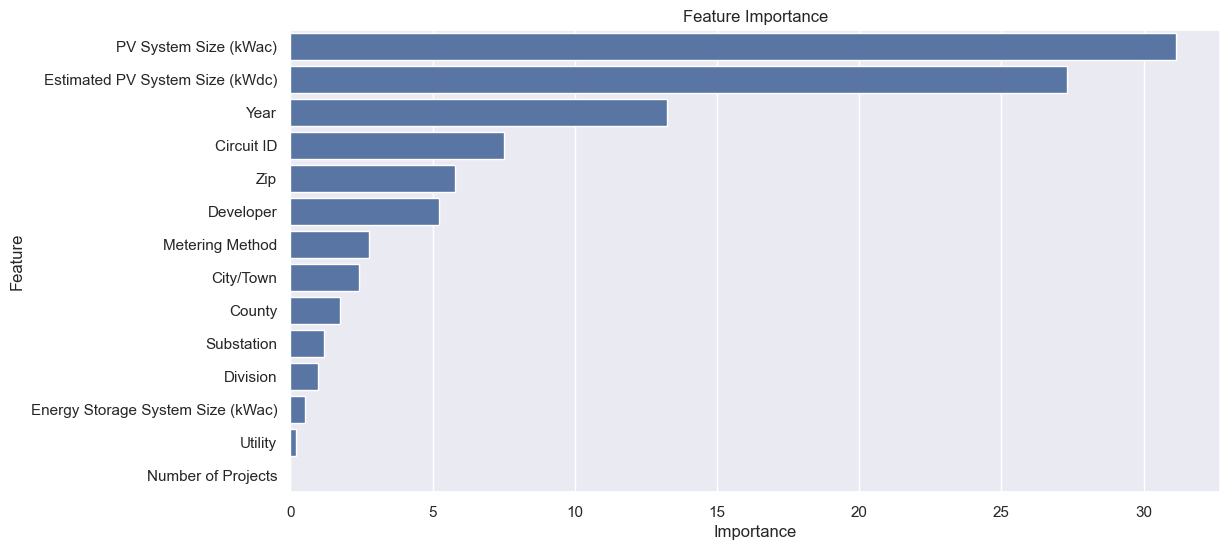

In [103]:
# Feature Importance plot
if hasattr(cat_model, 'feature_importances_'):
    importance = cat_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# **| Random Forest Regressor:-**

In [104]:
# Train the Random Forest model
Rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
Rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [105]:
# Make predictions and evaluate the model
Rf_pred = Rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, Rf_pred))
mae = mean_absolute_error(y_test, Rf_pred)
r2 = r2_score(y_test, Rf_pred)

In [106]:
# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Root Mean Squared Error (RMSE): 10775.060383686177
Mean Absolute Error (MAE): 180.4108066683158
R2 Score: 0.9988994760756856


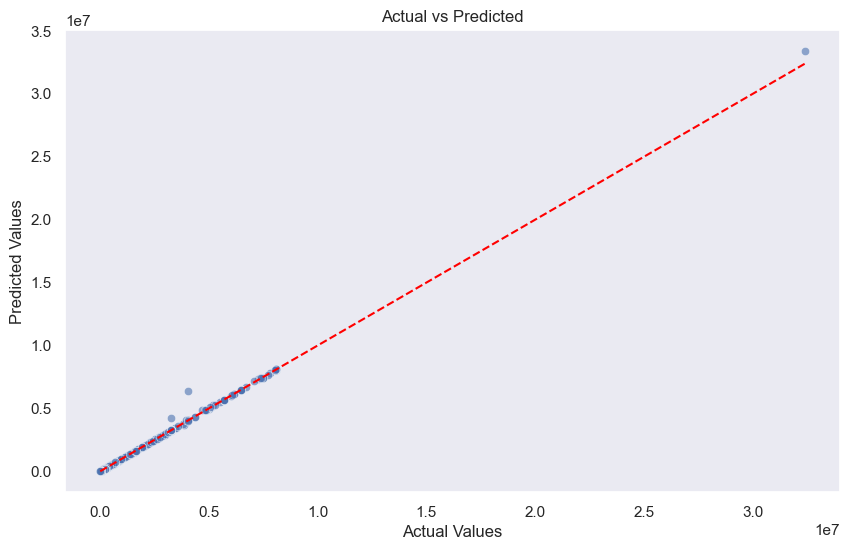

In [107]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=Rf_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

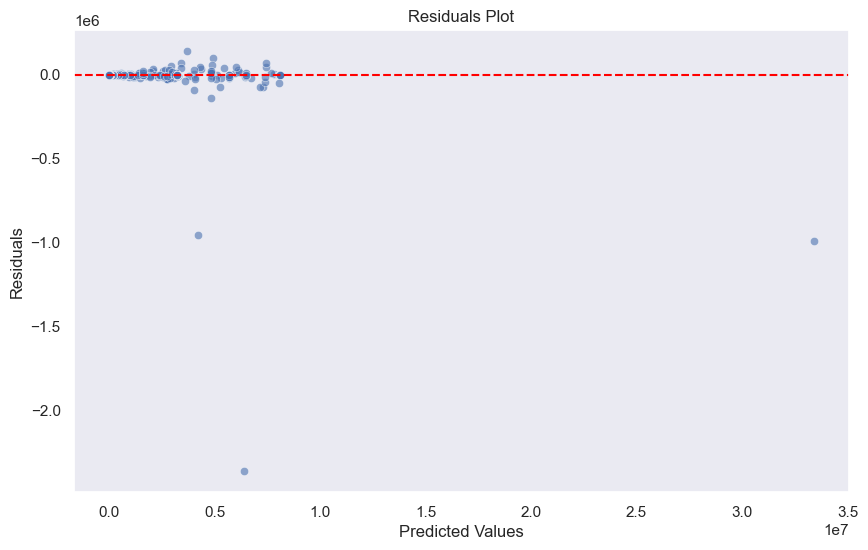

In [108]:
# Residuals plot
residuals = y_test - Rf_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Rf_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()

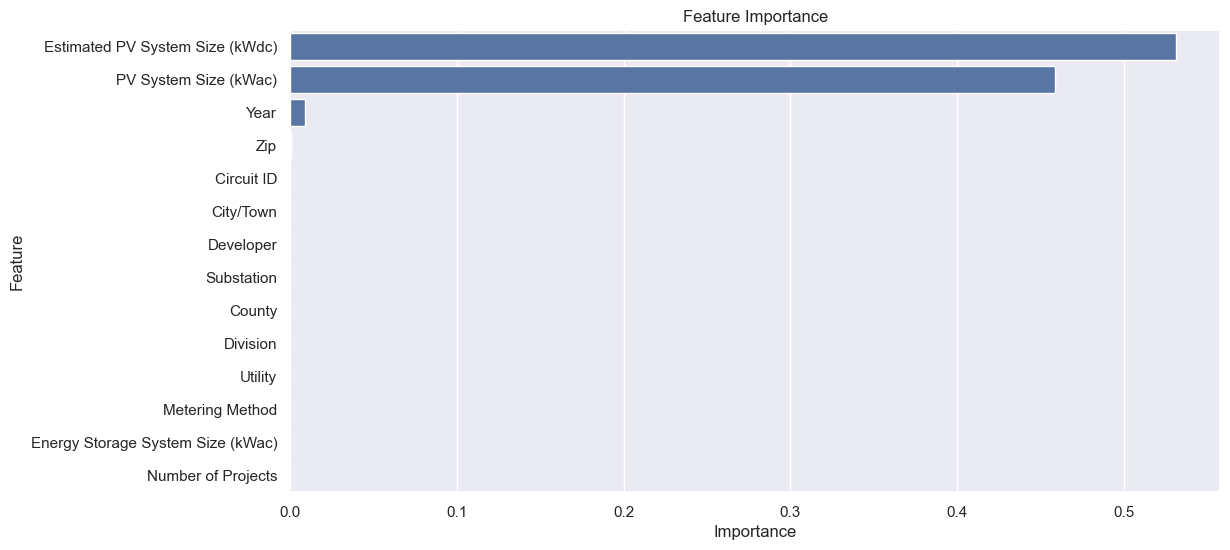

In [130]:
# Feature Importance plot (if applicable to the model)
if hasattr(Rf_model, 'feature_importances_'):
    importance = Rf_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# **|Gradiant Boosting Regressor:-**

In [115]:
# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=200, random_state=42)

In [116]:
# Make predictions and evaluate the model
gb_pred = gb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
mae = mean_absolute_error(y_test, gb_pred)
r2 = r2_score(y_test, gb_pred)

In [117]:
# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Root Mean Squared Error (RMSE): 42642.087619422055
Mean Absolute Error (MAE): 213.7954256384474
R2 Score: 0.9827639804007574


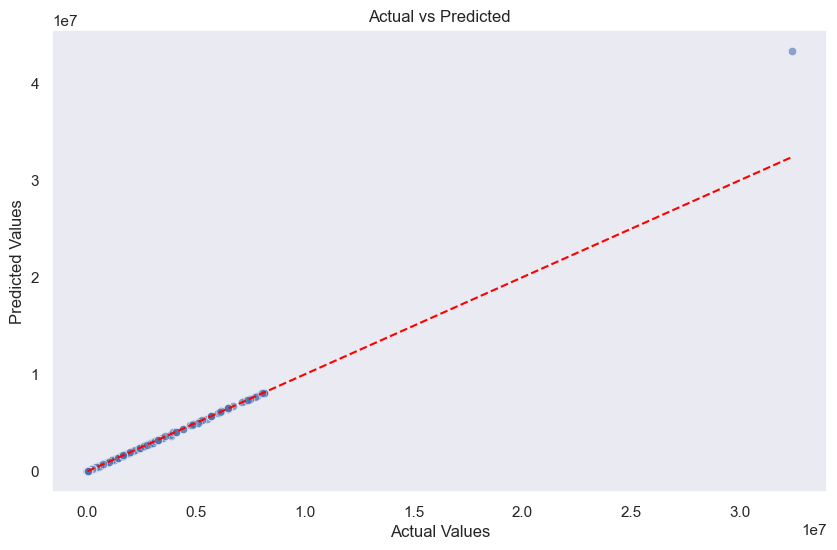

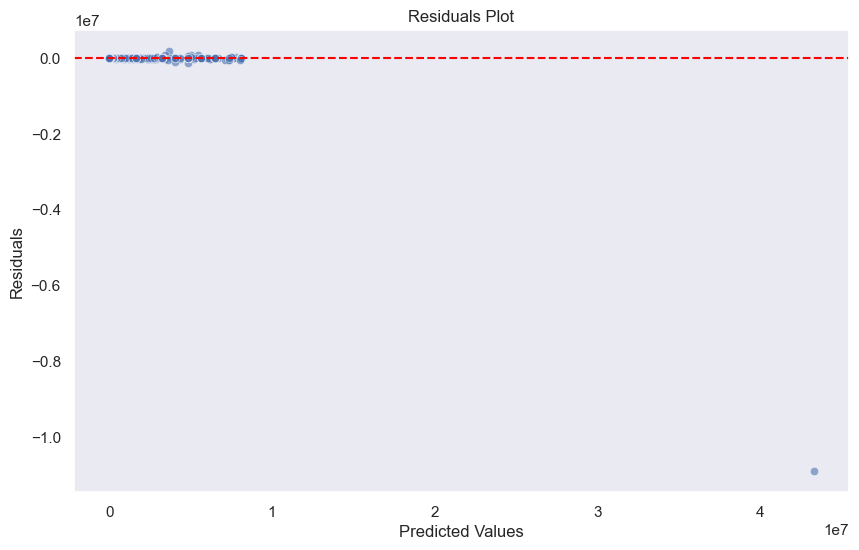

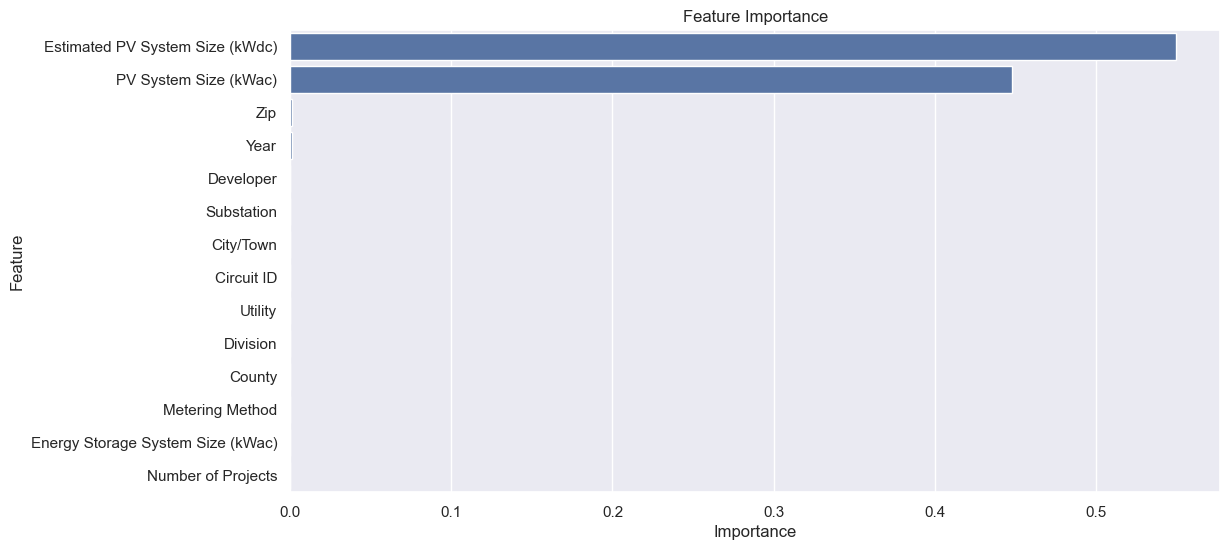

In [118]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

# Residuals Plot
residuals = y_test - gb_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gb_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()

# Feature Importance Plot
if hasattr(gb_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': gb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# **<p style="background-color:yellow; font-family:Book Antiqua; color:red; font-size:120%; text-align:center; border-radius:1000px 1000px;"> | Results For All Models |</p>**

In [136]:
results = []

# Define a helper function for evaluation
def evaluate_model(model_name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "RMSE": rmse, "MAE": mae, "R2": r2})

# Evaluate XGBoost
evaluate_model("XGBoost", y_test, xgb_pred)

# Evaluate LightGBM
evaluate_model("LightGBM", y_test, lgb_pred)

# Evaluate CatBoost
evaluate_model("CatBoost", y_test, cat_pred)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, Rf_pred)

# Evaluate Gradient Boosting
evaluate_model("Gradient Boosting", y_test, gb_pred)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display comparison table
results_df

,Model,RMSE,MAE,R2
0,XGBoost,121471.696100,7097.747580,0.860135
1,LightGBM,74710.471058,2844.014858,0.947092
2,CatBoost,94486.653254,7985.028009,0.915375
3,Random Forest,10775.060384,180.410807,0.998899
4,Gradient Boosting,42642.087619,213.795426,0.982764


# **<p style="background-color:skyblue; font-family:Book Antiqua; color:red; font-size:120%; text-align:center; border-radius:1000px 1000px;"> | Model Comparision|</p>**

- # **RMSE**

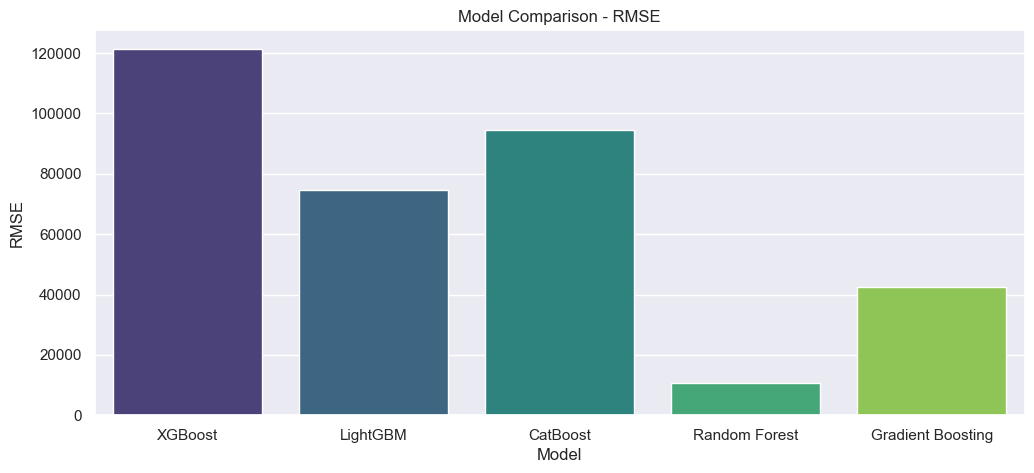

In [127]:
plt.figure(figsize=(12, 5))
metrics = ["RMSE"]
for metric in metrics:
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks()
    plt.show()

# **|Model Comparison - RMSE-**

This bar chart provides a comparative analysis of the **Root Mean Square Error (RMSE)** values for five different machine learning models, showcasing their performance in regression tasks.

## Model RMSE Overview:

- **XGBoost**
  - RMSE: **~120,000** (Highest)
  
- **LightGBM**
  - RMSE: **> 70,000** (Moderate)
  
- **CatBoost**
  - RMSE: **< 90,000** (Moderate)
  
- **Random Forest**
  - RMSE: **~10,000** (Lowest)
  
- **Gradient Boosting**
  - RMSE: **> 30,000** (Moderate)

---

### Insights:
- The **lower the RMSE**, the **better the model's accuracy** in predicting outcomes.
- **Random Forest** stands out with the **lowest RMSE**, indicating superior performance among the models compared.
- **XGBoost** shows the highest RMSE, suggesting it may not be the most suitable choice for this specific regression task.

---

- # **MAE**

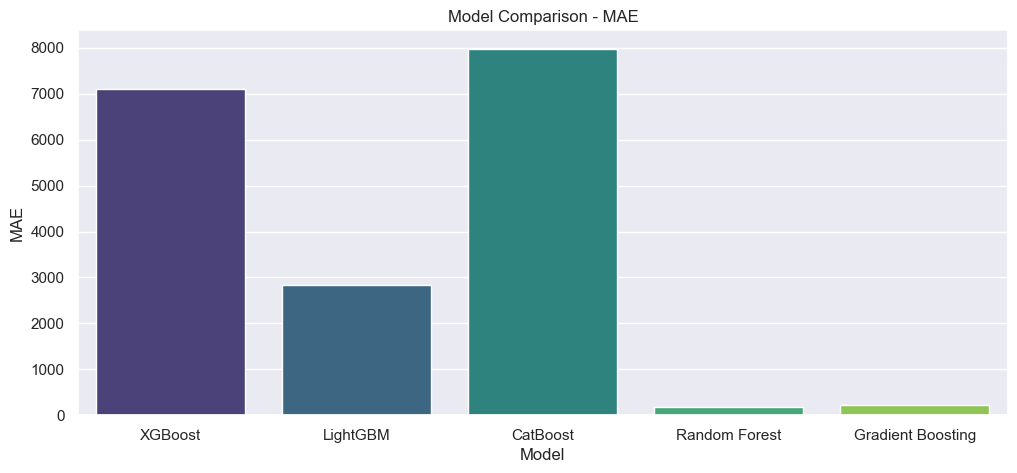

In [128]:
plt.figure(figsize=(12, 5))
metrics = ["MAE"]
for metric in metrics:
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks()
    plt.show()

# |**Model Comparison - MAE**

This bar chart presents a comparative analysis of the **Mean Absolute Error (MAE)** values for five distinct machine learning models, emphasizing their prediction accuracy.

## Model MAE Overview:

- **XGBoost**
  - MAE: **~7,500**
  
- **LightGBM**
  - MAE: **~3,000**
  
- **CatBoost**
  - MAE: **~8,000**
  
- **Random Forest**
  - MAE: **~500** (Lowest)
  
- **Gradient Boosting**
  - MAE: **~500** (Lowest)

---

### Insights:
- In this context, **lower MAE** values signify **better prediction accuracy** for the models.
- **Random Forest** and **Gradient Boosting** both excel with the **lowest MAE**, indicating they are highly accurate in their predictions.
- **LightGBM** also performs well, with a relatively low MAE, while **XGBoost** and **CatBoost** show higher error rates.

---

- # **R2**

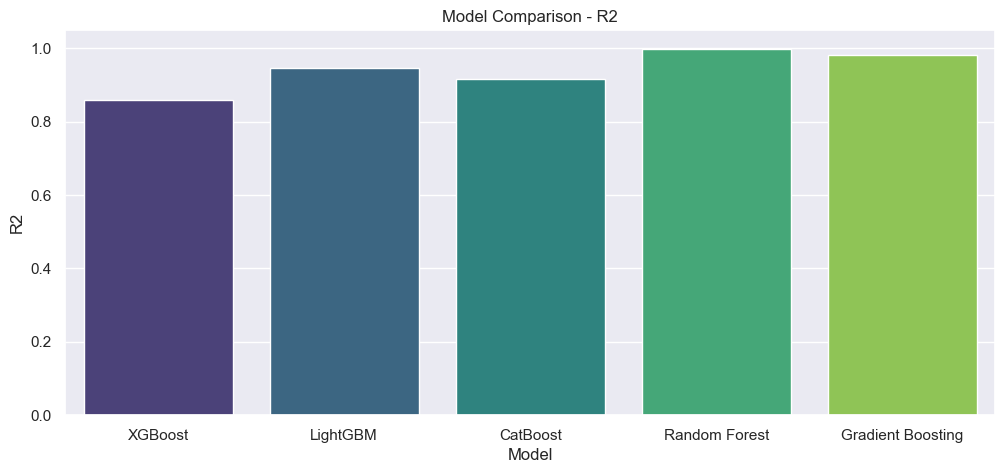

In [129]:
plt.figure(figsize=(12, 5))
metrics = ["R2"]
for metric in metrics:
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks()
    plt.show()

# **|Model Comparison - R²**

This bar chart illustrates a comparison of the **R-squared (R²)** values for five different machine learning models, providing insights into their performance in explaining the variability of the response data.

## Model R² Overview:

- **XGBoost**
  - R²: **~0.9** (Slightly below)
  
- **LightGBM**
  - R²: **~0.9** (Slightly above)
  
- **CatBoost**
  - R²: **~0.95** (Slightly below)
  
- **Random Forest**
  - R²: **~0.95** (Slightly above)
  
- **Gradient Boosting**
  - R²: **~0.95** (Slightly below)

---

### Insights:
- The **R² values** measure how effectively each model explains the variability in the response data, with **higher values** indicating **better model performance**.
- **Random Forest** and **LightGBM** demonstrate strong explanatory power with **R² values slightly above 0.95** and **0.9**, respectively.
- **CatBoost** and **Gradient Boosting** also show competitive performance with values close to **0.95**, while **XGBoost** remains just below the **0.9** threshold.

This visualization effectively highlights the **relative performance** of these machine learning models, guiding data scientists in selecting the best model for their predictive tasks.

---

# **|Performance Comparison of Machine Learning Models:-**

This summary combines insights from three plots that compare the performance of five machine learning models—**XGBoost**, **LightGBM**, **CatBoost**, **Random Forest**, and **Gradient Boosting**—based on three key metrics: **Root Mean Square Error (RMSE)**, **Mean Absolute Error (MAE)**, and **R-Squared (R²)**.

## **Performance Metrics Overview:**

### 1. Root Mean Square Error (RMSE)
- **XGBoost**: RMSE of **~120,000** (Highest)
- **Random Forest**: RMSE of **~10,000** (Lowest)

### 2. Mean Absolute Error (MAE)
- **XGBoost**: MAE of **~7,500**
- **Random Forest**: MAE of **~500** (Lowest)

### 3. R-Squared (R²)
- **XGBoost**: R² value **< 0.9**
- **Random Forest**: R² value **> 0.95** (Highest)

---

## ***Conclusion:***
**Random Forest** emerges as the **top-performing model** across all three metrics:
- It consistently achieves the **lowest RMSE and MAE**, indicating superior accuracy and reliability.
- It also boasts the **highest R² value**, demonstrating its effectiveness in explaining the variability of the response data.

**Conversely, **XGBoost**, while popular in machine learning circles, displays the **highest error rates** and the **lowest R² value** among the models evaluated, suggesting it may be the **least accurate** choice in this specific context.**